In [1]:
!pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.3/802.3 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 29.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 7.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-1

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import io
import os
from google.colab import drive
from statsmodels.datasets import get_rdataset
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer,LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,KFold
from sklearn.tree import export_text
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,r2_score, mean_absolute_error, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.inspection import permutation_importance

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


#Data CleanUp

In [4]:
Directory = '/content/drive/My Drive/CSV'
drive.mount('/content/drive')
csv_file = os.path.join(Directory,  'air-pollution.csv')
if os.path.exists(csv_file):
  initial_air_pollution_df = pd.read_csv(csv_file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
initial_air_pollution_df.head()

Entity Code  Year  Nitrogen oxide (NOx)  \
0  Afghanistan  AFG  1750             555.47860   
1  Afghanistan  AFG  1760             578.50757   
2  Afghanistan  AFG  1770             602.47980   
3  Afghanistan  AFG  1780             627.43220   
4  Afghanistan  AFG  1790             653.40310   

   Sulphur dioxide (SO₂) emissions  Carbon monoxide (CO) emissions  \
0                        174.87167                       142073.31   
1                        181.99332                       147859.23   
2                        189.38850                       153867.40   
3                        197.06535                       160104.42   
4                        205.03189                       166576.77   

   Organic carbon (OC) emissions  \
0                      5456.8850   
1                      5679.1167   
2                      5909.8840   
3                      6149.4410   
4                      6398.0370   

   Non-methane volatile organic compounds (NMVOC) emissions  \
0                                          13596.633          
1                                          14150.870          
2                                          14726.470          
3                                          15324.077          
4                                          15944.332          

   Black carbon (BC) emissions  Ammonia (NH₃) emissions  
0                    1633.0308                7681.0464  
1                    1699.5359                8000.8574  
2                    1768.5956                8333.9610  
3                    1840.2854                8680.9060  
4                    1914.6805                9042.2660

In [6]:
air_pollution_df = initial_air_pollution_df[(initial_air_pollution_df['Year'] >= 1960) & (initial_air_pollution_df['Year'] <= 2022)]

In [8]:
air_pollution_df.head()

Entity Code  Year  Nitrogen oxide (NOx)  \
165  Afghanistan  AFG  1960             69198.870   
166  Afghanistan  AFG  1961             74638.484   
167  Afghanistan  AFG  1962             91568.445   
168  Afghanistan  AFG  1963             98810.940   
169  Afghanistan  AFG  1964            119275.230   

     Sulphur dioxide (SO₂) emissions  Carbon monoxide (CO) emissions  \
165                        2085.2050                       302123.40   
166                        2352.8745                       298024.50   
167                        3063.7595                       322188.22   
168                        3153.3672                       319572.25   
169                        3732.0688                       348701.20   

     Organic carbon (OC) emissions  \
165                     12362.0850   
166                     12396.0840   
167                     12480.9375   
168                     12500.5740   
169                     12537.9540   

     Non-methane volatile organic compounds (NMVOC) emissions  \
165                                           85092.14          
166                                           90855.79          
167                                          109500.31          
168                                          117117.96          
169                                          139542.55          

     Black carbon (BC) emissions  Ammonia (NH₃) emissions  
165                    3770.6980                42092.555  
166                    3791.6514                42172.020  
167                    3845.2188                43215.242  
168                    3847.2212                43928.008  
169                    3874.8452                44673.980

In [9]:
Directory = '/content/drive/My Drive/CSV'
drive.mount('/content/drive')
csv_file = os.path.join(Directory,  'urban-population.csv')
if os.path.exists(csv_file):
  initial_urban_population_df = pd.read_csv(csv_file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
initial_urban_population_df.head()

Country Name Country Code    Indicator Name Indicator Code  \
0                        Aruba          ABW  Urban population    SP.URB.TOTL   
1  Africa Eastern and Southern          AFE  Urban population    SP.URB.TOTL   
2                  Afghanistan          AFG  Urban population    SP.URB.TOTL   
3   Africa Western and Central          AFW  Urban population    SP.URB.TOTL   
4                       Angola          AGO  Urban population    SP.URB.TOTL   

         1960        1961        1962        1963        1964        1965  \
0     27728.0     28330.0     28764.0     29157.0     29505.0     29802.0   
1  19033821.0  19872354.0  20770791.0  21737424.0  22773061.0  23870852.0   
2    724373.0    763336.0    805062.0    849446.0    896820.0    947332.0   
3  14301917.0  14986610.0  15707826.0  16480638.0  17302426.0  18177351.0   
4    559023.0    587555.0    618618.0    650924.0    684074.0    717302.0   

   ...         2014         2015         2016         2017         2018  \
0  ...      44588.0      44943.0      45297.0      45648.0      45999.0   
1  ...  198073453.0  206556403.0  215083441.0  223732229.0  232922327.0   
2  ...    8043935.0    8371880.0    8665979.0    8999963.0    9353296.0   
3  ...  175773257.0  183117253.0  190684610.0  198494008.0  206492202.0   
4  ...   17017877.0   17845914.0   18702478.0   19586972.0   20488542.0   

          2019         2020         2021         2022  2023  
0      46351.0      46574.0      46734.0      46891.0   NaN  
1  242451140.0  252315481.0  262377061.0  272666107.0   NaN  
2    9727157.0   10142913.0   10551772.0   10946834.0   NaN  
3  214684207.0  223107995.0  231704052.0  240494466.0   NaN  
4   21410634.0   22338586.0   23276246.0   24229338.0   NaN  

[5 rows x 68 columns]

In [11]:
initial_urban_population_df = initial_urban_population_df.iloc[:, :-1]
initial_urban_population_df = initial_urban_population_df.drop(initial_urban_population_df.columns[[2, 3]], axis=1)

In [12]:
initial_urban_population_df.head()

Country Name Country Code        1960        1961  \
0                        Aruba          ABW     27728.0     28330.0   
1  Africa Eastern and Southern          AFE  19033821.0  19872354.0   
2                  Afghanistan          AFG    724373.0    763336.0   
3   Africa Western and Central          AFW  14301917.0  14986610.0   
4                       Angola          AGO    559023.0    587555.0   

         1962        1963        1964        1965        1966        1967  \
0     28764.0     29157.0     29505.0     29802.0     30052.0     30160.0   
1  20770791.0  21737424.0  22773061.0  23870852.0  25025740.0  26239326.0   
2    805062.0    849446.0    896820.0    947332.0   1001109.0   1058060.0   
3  15707826.0  16480638.0  17302426.0  18177351.0  19066154.0  20003782.0   
4    618618.0    650924.0    684074.0    717302.0    750290.0    783275.0   

   ...         2013         2014         2015         2016         2017  \
0  ...      44228.0      44588.0      44943.0      45297.0      45648.0   
1  ...  190108778.0  198073453.0  206556403.0  215083441.0  223732229.0   
2  ...    7687539.0    8043935.0    8371880.0    8665979.0    8999963.0   
3  ...  168643432.0  175773257.0  183117253.0  190684610.0  198494008.0   
4  ...   16211664.0   17017877.0   17845914.0   18702478.0   19586972.0   

          2018         2019         2020         2021         2022  
0      45999.0      46351.0      46574.0      46734.0      46891.0  
1  232922327.0  242451140.0  252315481.0  262377061.0  272666107.0  
2    9353296.0    9727157.0   10142913.0   10551772.0   10946834.0  
3  206492202.0  214684207.0  223107995.0  231704052.0  240494466.0  
4   20488542.0   21410634.0   22338586.0   23276246.0   24229338.0  

[5 rows x 65 columns]

In [13]:
urban_population_df = pd.melt(initial_urban_population_df,
                                     id_vars=['Country Name', 'Country Code'],
                                     var_name='Year',
                                     value_name='Urban Population')
urban_population_df = urban_population_df.sort_values(by=['Country Name', 'Year'])

In [14]:
urban_population_df.head()

Country Name Country Code  Year  Urban Population
2     Afghanistan          AFG  1960          724373.0
268   Afghanistan          AFG  1961          763336.0
534   Afghanistan          AFG  1962          805062.0
800   Afghanistan          AFG  1963          849446.0
1066  Afghanistan          AFG  1964          896820.0

In [15]:
air_pollution_df['Year'] = air_pollution_df['Year'].astype(str)
urban_population_df['Year'] = urban_population_df['Year'].astype(str)

merged_df = pd.merge(air_pollution_df, urban_population_df,
                     left_on=['Entity', 'Code', 'Year'],
                     right_on=['Country Name', 'Country Code', 'Year'],
                     how='inner')

merged_df.drop(['Country Name', 'Country Code'], axis=1, inplace=True)

<ipython-input-15-d2077c0085bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_pollution_df['Year'] = air_pollution_df['Year'].astype(str)


In [16]:
merged_df.head()

Entity Code  Year  Nitrogen oxide (NOx)  \
0  Afghanistan  AFG  1960             69198.870   
1  Afghanistan  AFG  1961             74638.484   
2  Afghanistan  AFG  1962             91568.445   
3  Afghanistan  AFG  1963             98810.940   
4  Afghanistan  AFG  1964            119275.230   

   Sulphur dioxide (SO₂) emissions  Carbon monoxide (CO) emissions  \
0                        2085.2050                       302123.40   
1                        2352.8745                       298024.50   
2                        3063.7595                       322188.22   
3                        3153.3672                       319572.25   
4                        3732.0688                       348701.20   

   Organic carbon (OC) emissions  \
0                     12362.0850   
1                     12396.0840   
2                     12480.9375   
3                     12500.5740   
4                     12537.9540   

   Non-methane volatile organic compounds (NMVOC) emissions  \
0                                           85092.14          
1                                           90855.79          
2                                          109500.31          
3                                          117117.96          
4                                          139542.55          

   Black carbon (BC) emissions  Ammonia (NH₃) emissions  Urban Population  
0                    3770.6980                42092.555          724373.0  
1                    3791.6514                42172.020          763336.0  
2                    3845.2188                43215.242          805062.0  
3                    3847.2212                43928.008          849446.0  
4                    3874.8452                44673.980          896820.0

In [17]:
Directory = '/content/drive/My Drive/CSV'
drive.mount('/content/drive')
csv_file = os.path.join(Directory,  'rural-population.csv')
if os.path.exists(csv_file):
  initial_rural_population_df = pd.read_csv(csv_file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
initial_rural_population_df.head()

Country Name Country Code    Indicator Name Indicator Code  \
0                        Aruba          ABW  Rural population    SP.RUR.TOTL   
1  Africa Eastern and Southern          AFE  Rural population    SP.RUR.TOTL   
2                  Afghanistan          AFG  Rural population    SP.RUR.TOTL   
3   Africa Western and Central          AFW  Rural population    SP.RUR.TOTL   
4                       Angola          AGO  Rural population    SP.RUR.TOTL   

          1960         1961         1962         1963         1964  \
0      26880.0      27481.0      27918.0      28318.0      28673.0   
1  111658758.0  114296883.0  117064799.0  119893122.0  122832934.0   
2    7898093.0    8026804.0    8163985.0    8308019.0    8458694.0   
3   82954373.0   84327418.0   85737206.0   87186879.0   88657553.0   
4    4798172.0    4853778.0    4902782.0    4948903.0    4989125.0   

          1965  ...         2014         2015         2016         2017  \
0      28980.0  ...      59006.0      59314.0      59577.0      59791.0   
1  125871499.0  ...  385577648.0  393452021.0  401294164.0  409014341.0   
2    8617815.0  ...   24672275.0   25381619.0   25970228.0   26643455.0   
3   90158852.0  ...  222082250.0  225573122.0  229093774.0  232644696.0   
4    5019280.0  ...   10110460.0   10281807.0   10452268.0   10621656.0   

          2018         2019         2020         2021         2022  2023  
0      59963.0      60091.0      60011.0      59803.0      59554.0   NaN  
1  416834821.0  424791846.0  432797498.0  440600045.0  448193025.0   NaN  
2   27333488.0   28042342.0   28829317.0   29547690.0   30181937.0   NaN  
3  236154623.0  239621856.0  243081107.0  246481855.0  249836404.0   NaN  
4   10784991.0   10942954.0   11089900.0   11227528.0   11359649.0   NaN  

[5 rows x 68 columns]

In [19]:
initial_rural_population_df = initial_rural_population_df.iloc[:, :-1]
initial_rural_population_df = initial_rural_population_df.drop(initial_rural_population_df.columns[[2, 3]], axis=1)

In [20]:
initial_rural_population_df.head()

Country Name Country Code         1960         1961  \
0                        Aruba          ABW      26880.0      27481.0   
1  Africa Eastern and Southern          AFE  111658758.0  114296883.0   
2                  Afghanistan          AFG    7898093.0    8026804.0   
3   Africa Western and Central          AFW   82954373.0   84327418.0   
4                       Angola          AGO    4798172.0    4853778.0   

          1962         1963         1964         1965         1966  \
0      27918.0      28318.0      28673.0      28980.0      29239.0   
1  117064799.0  119893122.0  122832934.0  125871499.0  128929776.0   
2    8163985.0    8308019.0    8458694.0    8617815.0    8782038.0   
3   85737206.0   87186879.0   88657553.0   90158852.0   91732332.0   
4    4902782.0    4948903.0    4989125.0    5019280.0    5036754.0   

          1967  ...         2013         2014         2015         2016  \
0      29362.0  ...      58652.0      59006.0      59314.0      59577.0   
1  132073909.0  ...  377783371.0  385577648.0  393452021.0  401294164.0   
2    8951970.0  ...   23853670.0   24672275.0   25381619.0   25970228.0   
3   93316168.0  ...  218561121.0  222082250.0  225573122.0  229093774.0   
4    5044228.0  ...    9935338.0   10110460.0   10281807.0   10452268.0   

          2017         2018         2019         2020         2021  \
0      59791.0      59963.0      60091.0      60011.0      59803.0   
1  409014341.0  416834821.0  424791846.0  432797498.0  440600045.0   
2   26643455.0   27333488.0   28042342.0   28829317.0   29547690.0   
3  232644696.0  236154623.0  239621856.0  243081107.0  246481855.0   
4   10621656.0   10784991.0   10942954.0   11089900.0   11227528.0   

          2022  
0      59554.0  
1  448193025.0  
2   30181937.0  
3  249836404.0  
4   11359649.0  

[5 rows x 65 columns]

In [21]:
rural_population_df = pd.melt(initial_rural_population_df,
                                     id_vars=['Country Name', 'Country Code'],
                                     var_name='Year',
                                     value_name='Rural Population')

rural_population_df = rural_population_df.sort_values(by=['Country Name', 'Year'])

In [22]:
rural_population_df.head()

Country Name Country Code  Year  Rural Population
2     Afghanistan          AFG  1960         7898093.0
268   Afghanistan          AFG  1961         8026804.0
534   Afghanistan          AFG  1962         8163985.0
800   Afghanistan          AFG  1963         8308019.0
1066  Afghanistan          AFG  1964         8458694.0

In [23]:
rural_population_df['Year'] = rural_population_df['Year'].astype(str)

merged_df_1 = pd.merge(merged_df, rural_population_df,
                     left_on=['Entity', 'Code', 'Year'],
                     right_on=['Country Name', 'Country Code', 'Year'],
                     how='inner')

merged_df_1.drop(['Country Name', 'Country Code'], axis=1, inplace=True)

In [24]:
merged_df_1.head()

Entity Code  Year  Nitrogen oxide (NOx)  \
0  Afghanistan  AFG  1960             69198.870   
1  Afghanistan  AFG  1961             74638.484   
2  Afghanistan  AFG  1962             91568.445   
3  Afghanistan  AFG  1963             98810.940   
4  Afghanistan  AFG  1964            119275.230   

   Sulphur dioxide (SO₂) emissions  Carbon monoxide (CO) emissions  \
0                        2085.2050                       302123.40   
1                        2352.8745                       298024.50   
2                        3063.7595                       322188.22   
3                        3153.3672                       319572.25   
4                        3732.0688                       348701.20   

   Organic carbon (OC) emissions  \
0                     12362.0850   
1                     12396.0840   
2                     12480.9375   
3                     12500.5740   
4                     12537.9540   

   Non-methane volatile organic compounds (NMVOC) emissions  \
0                                           85092.14          
1                                           90855.79          
2                                          109500.31          
3                                          117117.96          
4                                          139542.55          

   Black carbon (BC) emissions  Ammonia (NH₃) emissions  Urban Population  \
0                    3770.6980                42092.555          724373.0   
1                    3791.6514                42172.020          763336.0   
2                    3845.2188                43215.242          805062.0   
3                    3847.2212                43928.008          849446.0   
4                    3874.8452                44673.980          896820.0   

   Rural Population  
0         7898093.0  
1         8026804.0  
2         8163985.0  
3         8308019.0  
4         8458694.0

In [25]:
Directory = '/content/drive/My Drive/CSV'
drive.mount('/content/drive')
csv_file = os.path.join(Directory,  'total-population.csv')
if os.path.exists(csv_file):
  initial_total_population_df = pd.read_csv(csv_file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
initial_total_population_df.head()

Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54608.0      55811.0      56682.0      57475.0      58178.0   
1  130692579.0  134169237.0  137835590.0  141630546.0  145605995.0   
2    8622466.0    8790140.0    8969047.0    9157465.0    9355514.0   
3   97256290.0   99314028.0  101445032.0  103667517.0  105959979.0   
4    5357195.0    5441333.0    5521400.0    5599827.0    5673199.0   

          1965  ...         2014         2015         2016         2017  \
0      58782.0  ...     103594.0     104257.0     104874.0     105439.0   
1  149742351.0  ...  583651101.0  600008424.0  616377605.0  632746570.0   
2    9565147.0  ...   32716210.0   33753499.0   34636207.0   35643418.0   
3  108336203.0  ...  397855507.0  408690375.0  419778384.0  431138704.0   
4    5736582.0  ...   27128337.0   28127721.0   29154746.0   30208628.0   

          2018         2019         2020         2021         2022  2023  
0     105962.0     106442.0     106585.0     106537.0     106445.0   NaN  
1  649757148.0  667242986.0  685112979.0  702977106.0  720859132.0   NaN  
2   36686784.0   37769499.0   38972230.0   40099462.0   41128771.0   NaN  
3  442646825.0  454306063.0  466189102.0  478185907.0  490330870.0   NaN  
4   31273533.0   32353588.0   33428486.0   34503774.0   35588987.0   NaN  

[5 rows x 68 columns]

In [27]:
initial_total_population_df = initial_total_population_df.iloc[:, :-1]
initial_total_population_df = initial_total_population_df.drop(initial_total_population_df.columns[[2, 3]], axis=1)

In [28]:
initial_total_population_df.head()

Country Name Country Code         1960         1961  \
0                        Aruba          ABW      54608.0      55811.0   
1  Africa Eastern and Southern          AFE  130692579.0  134169237.0   
2                  Afghanistan          AFG    8622466.0    8790140.0   
3   Africa Western and Central          AFW   97256290.0   99314028.0   
4                       Angola          AGO    5357195.0    5441333.0   

          1962         1963         1964         1965         1966  \
0      56682.0      57475.0      58178.0      58782.0      59291.0   
1  137835590.0  141630546.0  145605995.0  149742351.0  153955516.0   
2    8969047.0    9157465.0    9355514.0    9565147.0    9783147.0   
3  101445032.0  103667517.0  105959979.0  108336203.0  110798486.0   
4    5521400.0    5599827.0    5673199.0    5736582.0    5787044.0   

          1967  ...         2013         2014         2015         2016  \
0      59522.0  ...     102880.0     103594.0     104257.0     104874.0   
1  158313235.0  ...  567892149.0  583651101.0  600008424.0  616377605.0   
2   10010030.0  ...   31541209.0   32716210.0   33753499.0   34636207.0   
3  113319950.0  ...  387204553.0  397855507.0  408690375.0  419778384.0   
4    5827503.0  ...   26147002.0   27128337.0   28127721.0   29154746.0   

          2017         2018         2019         2020         2021  \
0     105439.0     105962.0     106442.0     106585.0     106537.0   
1  632746570.0  649757148.0  667242986.0  685112979.0  702977106.0   
2   35643418.0   36686784.0   37769499.0   38972230.0   40099462.0   
3  431138704.0  442646825.0  454306063.0  466189102.0  478185907.0   
4   30208628.0   31273533.0   32353588.0   33428486.0   34503774.0   

          2022  
0     106445.0  
1  720859132.0  
2   41128771.0  
3  490330870.0  
4   35588987.0  

[5 rows x 65 columns]

In [29]:
total_population_df = pd.melt(initial_total_population_df,
                                     id_vars=['Country Name', 'Country Code'],
                                     var_name='Year',
                                     value_name='Total Population')
total_population_df = total_population_df.sort_values(by=['Country Name', 'Year'])

In [30]:
total_population_df.head()

Country Name Country Code  Year  Total Population
2     Afghanistan          AFG  1960         8622466.0
268   Afghanistan          AFG  1961         8790140.0
534   Afghanistan          AFG  1962         8969047.0
800   Afghanistan          AFG  1963         9157465.0
1066  Afghanistan          AFG  1964         9355514.0

In [31]:
total_population_df['Year'] = total_population_df['Year'].astype(str)

merged_df_2 = pd.merge(merged_df_1, total_population_df,
                     left_on=['Entity', 'Code', 'Year'],
                     right_on=['Country Name', 'Country Code', 'Year'],
                     how='inner')

merged_df_2.drop(['Country Name', 'Country Code'], axis=1, inplace=True)

In [32]:
merged_df_2.head()

Entity Code  Year  Nitrogen oxide (NOx)  \
0  Afghanistan  AFG  1960             69198.870   
1  Afghanistan  AFG  1961             74638.484   
2  Afghanistan  AFG  1962             91568.445   
3  Afghanistan  AFG  1963             98810.940   
4  Afghanistan  AFG  1964            119275.230   

   Sulphur dioxide (SO₂) emissions  Carbon monoxide (CO) emissions  \
0                        2085.2050                       302123.40   
1                        2352.8745                       298024.50   
2                        3063.7595                       322188.22   
3                        3153.3672                       319572.25   
4                        3732.0688                       348701.20   

   Organic carbon (OC) emissions  \
0                     12362.0850   
1                     12396.0840   
2                     12480.9375   
3                     12500.5740   
4                     12537.9540   

   Non-methane volatile organic compounds (NMVOC) emissions  \
0                                           85092.14          
1                                           90855.79          
2                                          109500.31          
3                                          117117.96          
4                                          139542.55          

   Black carbon (BC) emissions  Ammonia (NH₃) emissions  Urban Population  \
0                    3770.6980                42092.555          724373.0   
1                    3791.6514                42172.020          763336.0   
2                    3845.2188                43215.242          805062.0   
3                    3847.2212                43928.008          849446.0   
4                    3874.8452                44673.980          896820.0   

   Rural Population  Total Population  
0         7898093.0         8622466.0  
1         8026804.0         8790140.0  
2         8163985.0         8969047.0  
3         8308019.0         9157465.0  
4         8458694.0         9355514.0

In [33]:
merged_df_2.shape

(11277, 13)

In [34]:
final_merged_df = merged_df_2.dropna()

In [35]:
final_merged_df.shape

(11277, 13)

In [36]:
final_merged_df.head()

Entity Code  Year  Nitrogen oxide (NOx)  \
0  Afghanistan  AFG  1960             69198.870   
1  Afghanistan  AFG  1961             74638.484   
2  Afghanistan  AFG  1962             91568.445   
3  Afghanistan  AFG  1963             98810.940   
4  Afghanistan  AFG  1964            119275.230   

   Sulphur dioxide (SO₂) emissions  Carbon monoxide (CO) emissions  \
0                        2085.2050                       302123.40   
1                        2352.8745                       298024.50   
2                        3063.7595                       322188.22   
3                        3153.3672                       319572.25   
4                        3732.0688                       348701.20   

   Organic carbon (OC) emissions  \
0                     12362.0850   
1                     12396.0840   
2                     12480.9375   
3                     12500.5740   
4                     12537.9540   

   Non-methane volatile organic compounds (NMVOC) emissions  \
0                                           85092.14          
1                                           90855.79          
2                                          109500.31          
3                                          117117.96          
4                                          139542.55          

   Black carbon (BC) emissions  Ammonia (NH₃) emissions  Urban Population  \
0                    3770.6980                42092.555          724373.0   
1                    3791.6514                42172.020          763336.0   
2                    3845.2188                43215.242          805062.0   
3                    3847.2212                43928.008          849446.0   
4                    3874.8452                44673.980          896820.0   

   Rural Population  Total Population  
0         7898093.0         8622466.0  
1         8026804.0         8790140.0  
2         8163985.0         8969047.0  
3         8308019.0         9157465.0  
4         8458694.0         9355514.0

In [37]:
final_merged_df.describe()

Nitrogen oxide (NOx)  Sulphur dioxide (SO₂) emissions  \
count          1.127700e+04                     1.127700e+04   
mean           4.269193e+05                     5.116283e+05   
std            1.987352e+06                     2.168453e+06   
min            0.000000e+00                     0.000000e+00   
25%            9.238666e+03                     3.507927e+03   
50%            4.138257e+04                     2.533388e+04   
75%            1.836213e+05                     1.800592e+05   
max            3.071117e+07                     3.778001e+07   

       Carbon monoxide (CO) emissions  Organic carbon (OC) emissions  \
count                    1.127700e+04                   1.127700e+04   
mean                     2.640091e+06                   5.594818e+04   
std                      1.472774e+07                   2.121402e+05   
min                      0.000000e+00                   0.000000e+00   
25%                      5.498026e+04                   1.734425e+03   
50%                      2.885990e+05                   1.070816e+04   
75%                      9.581444e+05                   3.410757e+04   
max                      2.152620e+08                   2.664139e+06   

       Non-methane volatile organic compounds (NMVOC) emissions  \
count                                       1.127700e+04          
mean                                        5.709467e+05          
std                                         2.341575e+06          
min                                         0.000000e+00          
25%                                         1.586467e+04          
50%                                         8.821911e+04          
75%                                         2.989485e+05          
max                                         3.136735e+07          

       Black carbon (BC) emissions  Ammonia (NH₃) emissions  Urban Population  \
count                 1.127700e+04             1.127700e+04      1.127700e+04   
mean                  2.455296e+04             2.290705e+05      1.209874e+07   
std                   1.103289e+05             9.442450e+05      4.540249e+07   
min                   0.000000e+00             0.000000e+00      9.600000e+02   
25%                   7.782246e+02             5.782151e+03      3.047920e+05   
50%                   4.092358e+03             3.635863e+04      1.920549e+06   
75%                   1.360401e+04             1.129845e+05      6.733350e+06   
max                   1.921052e+06             1.256013e+07      8.975784e+08   

       Rural Population  Total Population  
count      1.127700e+04      1.127700e+04  
mean       1.485911e+07      2.695785e+07  
std        7.478669e+07      1.137867e+08  
min        0.000000e+00      2.646000e+03  
25%        3.665720e+05      8.342150e+05  
50%        2.065228e+06      4.623291e+06  
75%        7.180774e+06      1.349102e+07  
max        9.093848e+08      1.417173e+09

In [38]:
len(final_merged_df['Code'].unique())

179

In [39]:
final_merged_df

Entity Code  Year  Nitrogen oxide (NOx)  \
0      Afghanistan  AFG  1960             69198.870   
1      Afghanistan  AFG  1961             74638.484   
2      Afghanistan  AFG  1962             91568.445   
3      Afghanistan  AFG  1963             98810.940   
4      Afghanistan  AFG  1964            119275.230   
...            ...  ...   ...                   ...   
11272     Zimbabwe  ZWE  2018             82210.490   
11273     Zimbabwe  ZWE  2019             79547.030   
11274     Zimbabwe  ZWE  2020             68338.914   
11275     Zimbabwe  ZWE  2021             71148.930   
11276     Zimbabwe  ZWE  2022             73363.710   

       Sulphur dioxide (SO₂) emissions  Carbon monoxide (CO) emissions  \
0                            2085.2050                       302123.40   
1                            2352.8745                       298024.50   
2                            3063.7595                       322188.22   
3                            3153.3672                       319572.25   
4                            3732.0688                       348701.20   
...                                ...                             ...   
11272                       56748.1840                      1557296.50   
11273                       53065.8750                      1574731.90   
11274                       43894.0600                      1593834.00   
11275                       45291.4180                      1624286.00   
11276                       51669.6500                      1626256.20   

       Organic carbon (OC) emissions  \
0                         12362.0850   
1                         12396.0840   
2                         12480.9375   
3                         12500.5740   
4                         12537.9540   
...                              ...   
11272                    111642.5100   
11273                    113660.8600   
11274                    115329.2340   
11275                    117177.1950   
11276                    117211.6800   

       Non-methane volatile organic compounds (NMVOC) emissions  \
0                                               85092.14          
1                                               90855.79          
2                                              109500.31          
3                                              117117.96          
4                                              139542.55          
...                                                  ...          
11272                                          291050.40          
11273                                          294380.62          
11274                                          298699.94          
11275                                          304488.38          
11276                                          305560.90          

       Black carbon (BC) emissions  Ammonia (NH₃) emissions  Urban Population  \
0                        3770.6980                42092.555          724373.0   
1                        3791.6514                42172.020          763336.0   
2                        3845.2188                43215.242          805062.0   
3                        3847.2212                43928.008          849446.0   
4                        3874.8452                44673.980          896820.0   
...                            ...                      ...               ...   
11272                   32050.9020               124543.016         4848158.0   
11273                   32552.8750               127205.270         4945719.0   
11274                   32467.2950               129910.930         5052214.0   
11275                   33174.6050               132651.480         5166388.0   
11276                   33231.3200               134480.580         5287038.0   

       Rural Population  Total Population  
0             7898093.0         8622466.0  
1             8026804.0         8790140.0  
2             8163985.0         8969047.0  
3             8308019.0    

# Converting to Income category

In [40]:
high_income_countries = [
    'ASM', 'AUS', 'BRN', 'GUM', 'HKG', 'JPN', 'KOR', 'MAC', 'MNP', 'NCL', 'NRU', 'NZL', 'PYF', 'SGP',
    'AND', 'AUT', 'BEL', 'CHE', 'CHI', 'CYP', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'FRO',
    'GBR', 'GIB', 'GRC', 'GRL', 'HRV', 'HUN', 'IMN', 'IRL', 'ISL', 'ITA', 'LIE', 'LTU', 'LUX', 'LVA',
    'MCO', 'NLD', 'NOR', 'POL', 'PRT', 'ROU', 'SMR', 'SVK', 'SVN', 'SWE', 'ABW', 'ATG', 'BHS', 'BRB',
    'CHL', 'CUW', 'CYM', 'GUY', 'KNA', 'MAF', 'PAN', 'PRI', 'SXM', 'TCA', 'TTO', 'URY', 'VGB', 'VIR',
    'ARE', 'BHR', 'ISR', 'KWT', 'MLT', 'OMN', 'QAT', 'SAU', 'BMU', 'CAN', 'USA', 'SYC'
]

low_income_countries = [
    'PRK', 'SYR', 'YEM', 'AFG', 'BDI', 'BFA', 'CAF', 'COD', 'ERI', 'ETH', 'GMB', 'GNB', 'LBR', 'MDG',
    'MLI', 'MOZ', 'MWI', 'NER', 'RWA', 'SDN', 'SLE', 'SOM', 'SSD', 'TCD', 'TGO', 'UGA'
]

lower_middle_income_countries = [
    'AGO','BEN','BGD','BOL','BTN','CIV','CMR','COG','COM','CPV','DJI','DZA','EGY','FSM','GHA','GIN','HND',
    'HTI','IND','IRN','JOR','KEN','KGZ','KHM','KIR','LAO','LBN','LKA','LSO','MAR','MMR','MNG','MRT','NGA',
    'NIC','NPL','PAK','PHL','PNG','SEN','SLB','STP','SWZ','TJK','TLS','TUN','TZA','UKR','UZB','VNM','VUT',
    'WSM','ZMB','ZWE'

]

upper_middle_income_countries = [
    'ALB','ARG','ARM','AZE','BGR','BIH','BLR','BLZ','BRA','BWA','CHN','COL','CRI','CUB','DMA','DOM','ECU',
    'FJI','GAB','GEO','GNQ','GRD','GTM','IDN','IRQ','JAM','KAZ','LBY','LCA','MDA','MDV','MEX','MHL','MKD',
    'MNE','MUS','MYS','NAM','PER','PLW','PRY','PSE','RUS','SLV','SRB','SUR','THA','TKM','TON','TUR','TUV',
    'VCT','XKX','ZAF'

]

def categorize_country(code):
    if code in high_income_countries:
        return 4
    elif code in upper_middle_income_countries:
        return 3
    elif code in low_income_countries:
        return 1
    elif code in lower_middle_income_countries:
        return 2
    else:
        return None
final_merged_df['Income_Category'] = final_merged_df['Code'].apply(categorize_country)

final_merged_df


Entity Code  Year  Nitrogen oxide (NOx)  \
0      Afghanistan  AFG  1960             69198.870   
1      Afghanistan  AFG  1961             74638.484   
2      Afghanistan  AFG  1962             91568.445   
3      Afghanistan  AFG  1963             98810.940   
4      Afghanistan  AFG  1964            119275.230   
...            ...  ...   ...                   ...   
11272     Zimbabwe  ZWE  2018             82210.490   
11273     Zimbabwe  ZWE  2019             79547.030   
11274     Zimbabwe  ZWE  2020             68338.914   
11275     Zimbabwe  ZWE  2021             71148.930   
11276     Zimbabwe  ZWE  2022             73363.710   

       Sulphur dioxide (SO₂) emissions  Carbon monoxide (CO) emissions  \
0                            2085.2050                       302123.40   
1                            2352.8745                       298024.50   
2                            3063.7595                       322188.22   
3                            3153.3672                       319572.25   
4                            3732.0688                       348701.20   
...                                ...                             ...   
11272                       56748.1840                      1557296.50   
11273                       53065.8750                      1574731.90   
11274                       43894.0600                      1593834.00   
11275                       45291.4180                      1624286.00   
11276                       51669.6500                      1626256.20   

       Organic carbon (OC) emissions  \
0                         12362.0850   
1                         12396.0840   
2                         12480.9375   
3                         12500.5740   
4                         12537.9540   
...                              ...   
11272                    111642.5100   
11273                    113660.8600   
11274                    115329.2340   
11275                    117177.1950   
11276                    117211.6800   

       Non-methane volatile organic compounds (NMVOC) emissions  \
0                                               85092.14          
1                                               90855.79          
2                                              109500.31          
3                                              117117.96          
4                                              139542.55          
...                                                  ...          
11272                                          291050.40          
11273                                          294380.62          
11274                                          298699.94          
11275                                          304488.38          
11276                                          305560.90          

       Black carbon (BC) emissions  Ammonia (NH₃) emissions  Urban Population  \
0                        3770.6980                42092.555          724373.0   
1                        3791.6514                42172.020          763336.0   
2                        3845.2188                43215.242          805062.0   
3                        3847.2212                43928.008          849446.0   
4                        3874.8452                44673.980          896820.0   
...                            ...                      ...               ...   
11272                   32050.9020               124543.016         4848158.0   
11273                   32552.8750               127205.270         4945719.0   
11274                   32467.2950               129910.930         5052214.0   
11275                   33174.6050               132651.480         5166388.0   
11276                   33231.3200               134480.580         5287038.0   

       Rural Population  Total Population  Income_Category  
0             7898093.0         8622466.0                1  
1             8026804.0         8790140.0                1  
2             816398

In [41]:
final_merged_df.shape

(11277, 14)

In [42]:
final_merged_df['Income_Category'].unique()


array([1, 3, 2, 4])

In [43]:
income_counts = final_merged_df['Income_Category'].value_counts()
income_counts

Income_Category
4    4158
3    2961
2    2835
1    1323
Name: count, dtype: int64


converting to Region category

In [44]:
east_asia_pacific = [
    'ASM', 'AUS', 'BRN', 'GUM', 'HKG', 'JPN', 'KOR', 'MAC', 'MNP', 'NCL', 'NRU', 'NZL', 'PYF', 'SGP',
    'PRK', 'FSM', 'KHM', 'KIR', 'LAO', 'MMR', 'MNG', 'PHL', 'PNG', 'SLB', 'TLS', 'VNM', 'VUT', 'WSM',
    'CHN', 'FJI', 'IDN', 'MHL', 'MYS', 'PLW', 'THA', 'TON', 'TUV'
]

europe_central_asia = [
    'AND', 'AUT', 'BEL', 'CHE', 'CHI', 'CYP', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'FRO',
    'GBR', 'GIB', 'GRC', 'GRL', 'HRV', 'HUN', 'IMN', 'IRL', 'ISL', 'ITA', 'LIE', 'LTU', 'LUX', 'LVA',
    'MCO', 'NLD', 'NOR', 'POL', 'PRT', 'ROU', 'SMR', 'SVK', 'SVN', 'SWE', 'KGZ', 'TJK', 'UKR', 'UZB',
    'ALB', 'ARM', 'AZE', 'BGR', 'BIH', 'BLR', 'GEO', 'KAZ', 'MDA', 'MKD', 'MNE', 'RUS', 'SRB', 'TKM',
    'TUR', 'XKX'
]

latin_america_caribbean = [
    'ABW', 'ATG', 'BHS', 'BRB', 'CHL', 'CUW', 'CYM', 'GUY', 'KNA', 'MAF', 'PAN', 'PRI', 'SXM', 'TCA',
    'TTO', 'URY', 'VGB', 'VIR', 'BOL', 'HND', 'HTI', 'NIC', 'ARG', 'BLZ', 'BRA', 'COL', 'CRI', 'CUB',
    'DMA', 'DOM', 'ECU', 'GRD', 'GTM', 'JAM', 'LCA', 'MEX', 'PER', 'PRY', 'SLV', 'SUR', 'VCT', 'VEN'
]

middle_east_north_africa = [
    'ARE', 'BHR', 'ISR', 'KWT', 'MLT', 'OMN', 'QAT', 'SAU', 'SYR', 'YEM', 'DJI', 'DZA', 'EGY', 'IRN',
    'JOR', 'LBN', 'MAR', 'TUN', 'IRQ', 'LBY', 'PSE'
]

north_america = ['BMU', 'CAN', 'USA']

south_asia = ['AFG', 'BGD', 'BTN', 'IND', 'LKA', 'NPL', 'PAK', 'MDV']

sub_saharan_africa = [
    'SYC', 'BDI', 'BFA', 'CAF', 'COD', 'ERI', 'ETH', 'GMB', 'GNB', 'LBR', 'MDG', 'MLI', 'MOZ', 'MWI',
    'NER', 'RWA', 'SDN', 'SLE', 'SOM', 'SSD', 'TCD', 'TGO', 'UGA', 'AGO', 'BEN', 'CIV', 'CMR', 'COG',
    'COM', 'CPV', 'GHA', 'GIN', 'KEN', 'LSO', 'MRT', 'NGA', 'SEN', 'STP', 'SWZ', 'TZA', 'ZMB', 'ZWE',
    'BWA', 'GAB', 'GNQ', 'MUS', 'NAM', 'ZAF'
]

def categorize_region(code):
    if code in east_asia_pacific:
        return 1
    elif code in europe_central_asia:
        return 2
    elif code in latin_america_caribbean:
        return 3
    elif code in middle_east_north_africa:
        return 4
    elif code in north_america:
        return 5
    elif code in south_asia:
        return 6
    elif code in sub_saharan_africa:
        return 7
    else:
        return None


final_merged_df['Region_Category'] = final_merged_df['Code'].apply(categorize_region)

region_counts = final_merged_df['Region_Category'].value_counts()

region_counts

Region_Category
2    3024
7    2772
3    2205
1    1575
4    1008
6     504
5     189
Name: count, dtype: int64

In [45]:
aggregated_df = final_merged_df

In [46]:
aggregated_df.head()


Entity Code  Year  Nitrogen oxide (NOx)  \
0  Afghanistan  AFG  1960             69198.870   
1  Afghanistan  AFG  1961             74638.484   
2  Afghanistan  AFG  1962             91568.445   
3  Afghanistan  AFG  1963             98810.940   
4  Afghanistan  AFG  1964            119275.230   

   Sulphur dioxide (SO₂) emissions  Carbon monoxide (CO) emissions  \
0                        2085.2050                       302123.40   
1                        2352.8745                       298024.50   
2                        3063.7595                       322188.22   
3                        3153.3672                       319572.25   
4                        3732.0688                       348701.20   

   Organic carbon (OC) emissions  \
0                     12362.0850   
1                     12396.0840   
2                     12480.9375   
3                     12500.5740   
4                     12537.9540   

   Non-methane volatile organic compounds (NMVOC) emissions  \
0                                           85092.14          
1                                           90855.79          
2                                          109500.31          
3                                          117117.96          
4                                          139542.55          

   Black carbon (BC) emissions  Ammonia (NH₃) emissions  Urban Population  \
0                    3770.6980                42092.555          724373.0   
1                    3791.6514                42172.020          763336.0   
2                    3845.2188                43215.242          805062.0   
3                    3847.2212                43928.008          849446.0   
4                    3874.8452                44673.980          896820.0   

   Rural Population  Total Population  Income_Category  Region_Category  
0         7898093.0         8622466.0                1                6  
1         8026804.0         8790140.0                1                6  
2         8163985.0         8969047.0                1                6  
3         8308019.0         9157465.0                1                6  
4         8458694.0         9355514.0                1                6

In [47]:
aggregated_df.describe()

Nitrogen oxide (NOx)  Sulphur dioxide (SO₂) emissions  \
count          1.127700e+04                     1.127700e+04   
mean           4.269193e+05                     5.116283e+05   
std            1.987352e+06                     2.168453e+06   
min            0.000000e+00                     0.000000e+00   
25%            9.238666e+03                     3.507927e+03   
50%            4.138257e+04                     2.533388e+04   
75%            1.836213e+05                     1.800592e+05   
max            3.071117e+07                     3.778001e+07   

       Carbon monoxide (CO) emissions  Organic carbon (OC) emissions  \
count                    1.127700e+04                   1.127700e+04   
mean                     2.640091e+06                   5.594818e+04   
std                      1.472774e+07                   2.121402e+05   
min                      0.000000e+00                   0.000000e+00   
25%                      5.498026e+04                   1.734425e+03   
50%                      2.885990e+05                   1.070816e+04   
75%                      9.581444e+05                   3.410757e+04   
max                      2.152620e+08                   2.664139e+06   

       Non-methane volatile organic compounds (NMVOC) emissions  \
count                                       1.127700e+04          
mean                                        5.709467e+05          
std                                         2.341575e+06          
min                                         0.000000e+00          
25%                                         1.586467e+04          
50%                                         8.821911e+04          
75%                                         2.989485e+05          
max                                         3.136735e+07          

       Black carbon (BC) emissions  Ammonia (NH₃) emissions  Urban Population  \
count                 1.127700e+04             1.127700e+04      1.127700e+04   
mean                  2.455296e+04             2.290705e+05      1.209874e+07   
std                   1.103289e+05             9.442450e+05      4.540249e+07   
min                   0.000000e+00             0.000000e+00      9.600000e+02   
25%                   7.782246e+02             5.782151e+03      3.047920e+05   
50%                   4.092358e+03             3.635863e+04      1.920549e+06   
75%                   1.360401e+04             1.129845e+05      6.733350e+06   
max                   1.921052e+06             1.256013e+07      8.975784e+08   

       Rural Population  Total Population  Income_Category  Region_Category  
count      1.127700e+04      1.127700e+04     11277.000000     11277.000000  
mean       1.485911e+07      2.695785e+07         2.882682         3.692737  
std        7.478669e+07      1.137867e+08         1.037168         2.199768  
min        0.000000e+00      2.646000e+03         1.000000         1.000000  
25%        3.665720e+05      8.342150e+05         2.000000         2.000000  
50%        2.065228e+06      4.623291e+06         3.000000         3.000000  
75%        7.180774e+06      1.349102e+07         4.000000         6.000000  
max        9.093848e+08      1.417173e+09         4.000000         7.000000

<ipython-input-49-48a42b39a434>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=final_merged_df, x='Income_Category', palette='viridis')


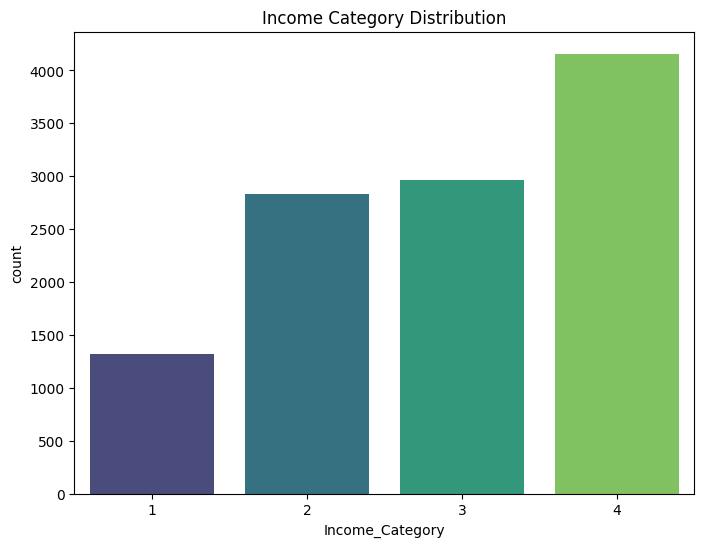

In [49]:
plt.figure(figsize=(8,6))
sns.countplot(data=final_merged_df, x='Income_Category', palette='viridis')
plt.title('Income Category Distribution')
plt.show()


<ipython-input-50-b72b11216960>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=final_merged_df, x='Region_Category', palette='viridis')


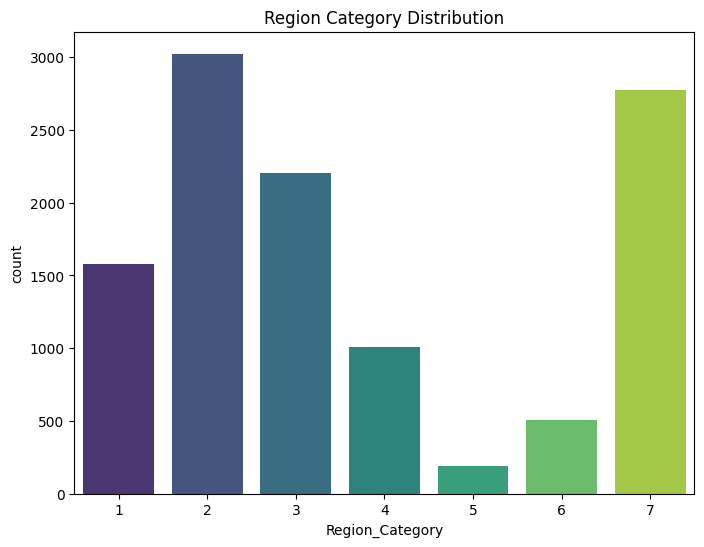

In [50]:
plt.figure(figsize=(8,6))
sns.countplot(data=final_merged_df, x='Region_Category', palette='viridis')
plt.title('Region Category Distribution')
plt.show()


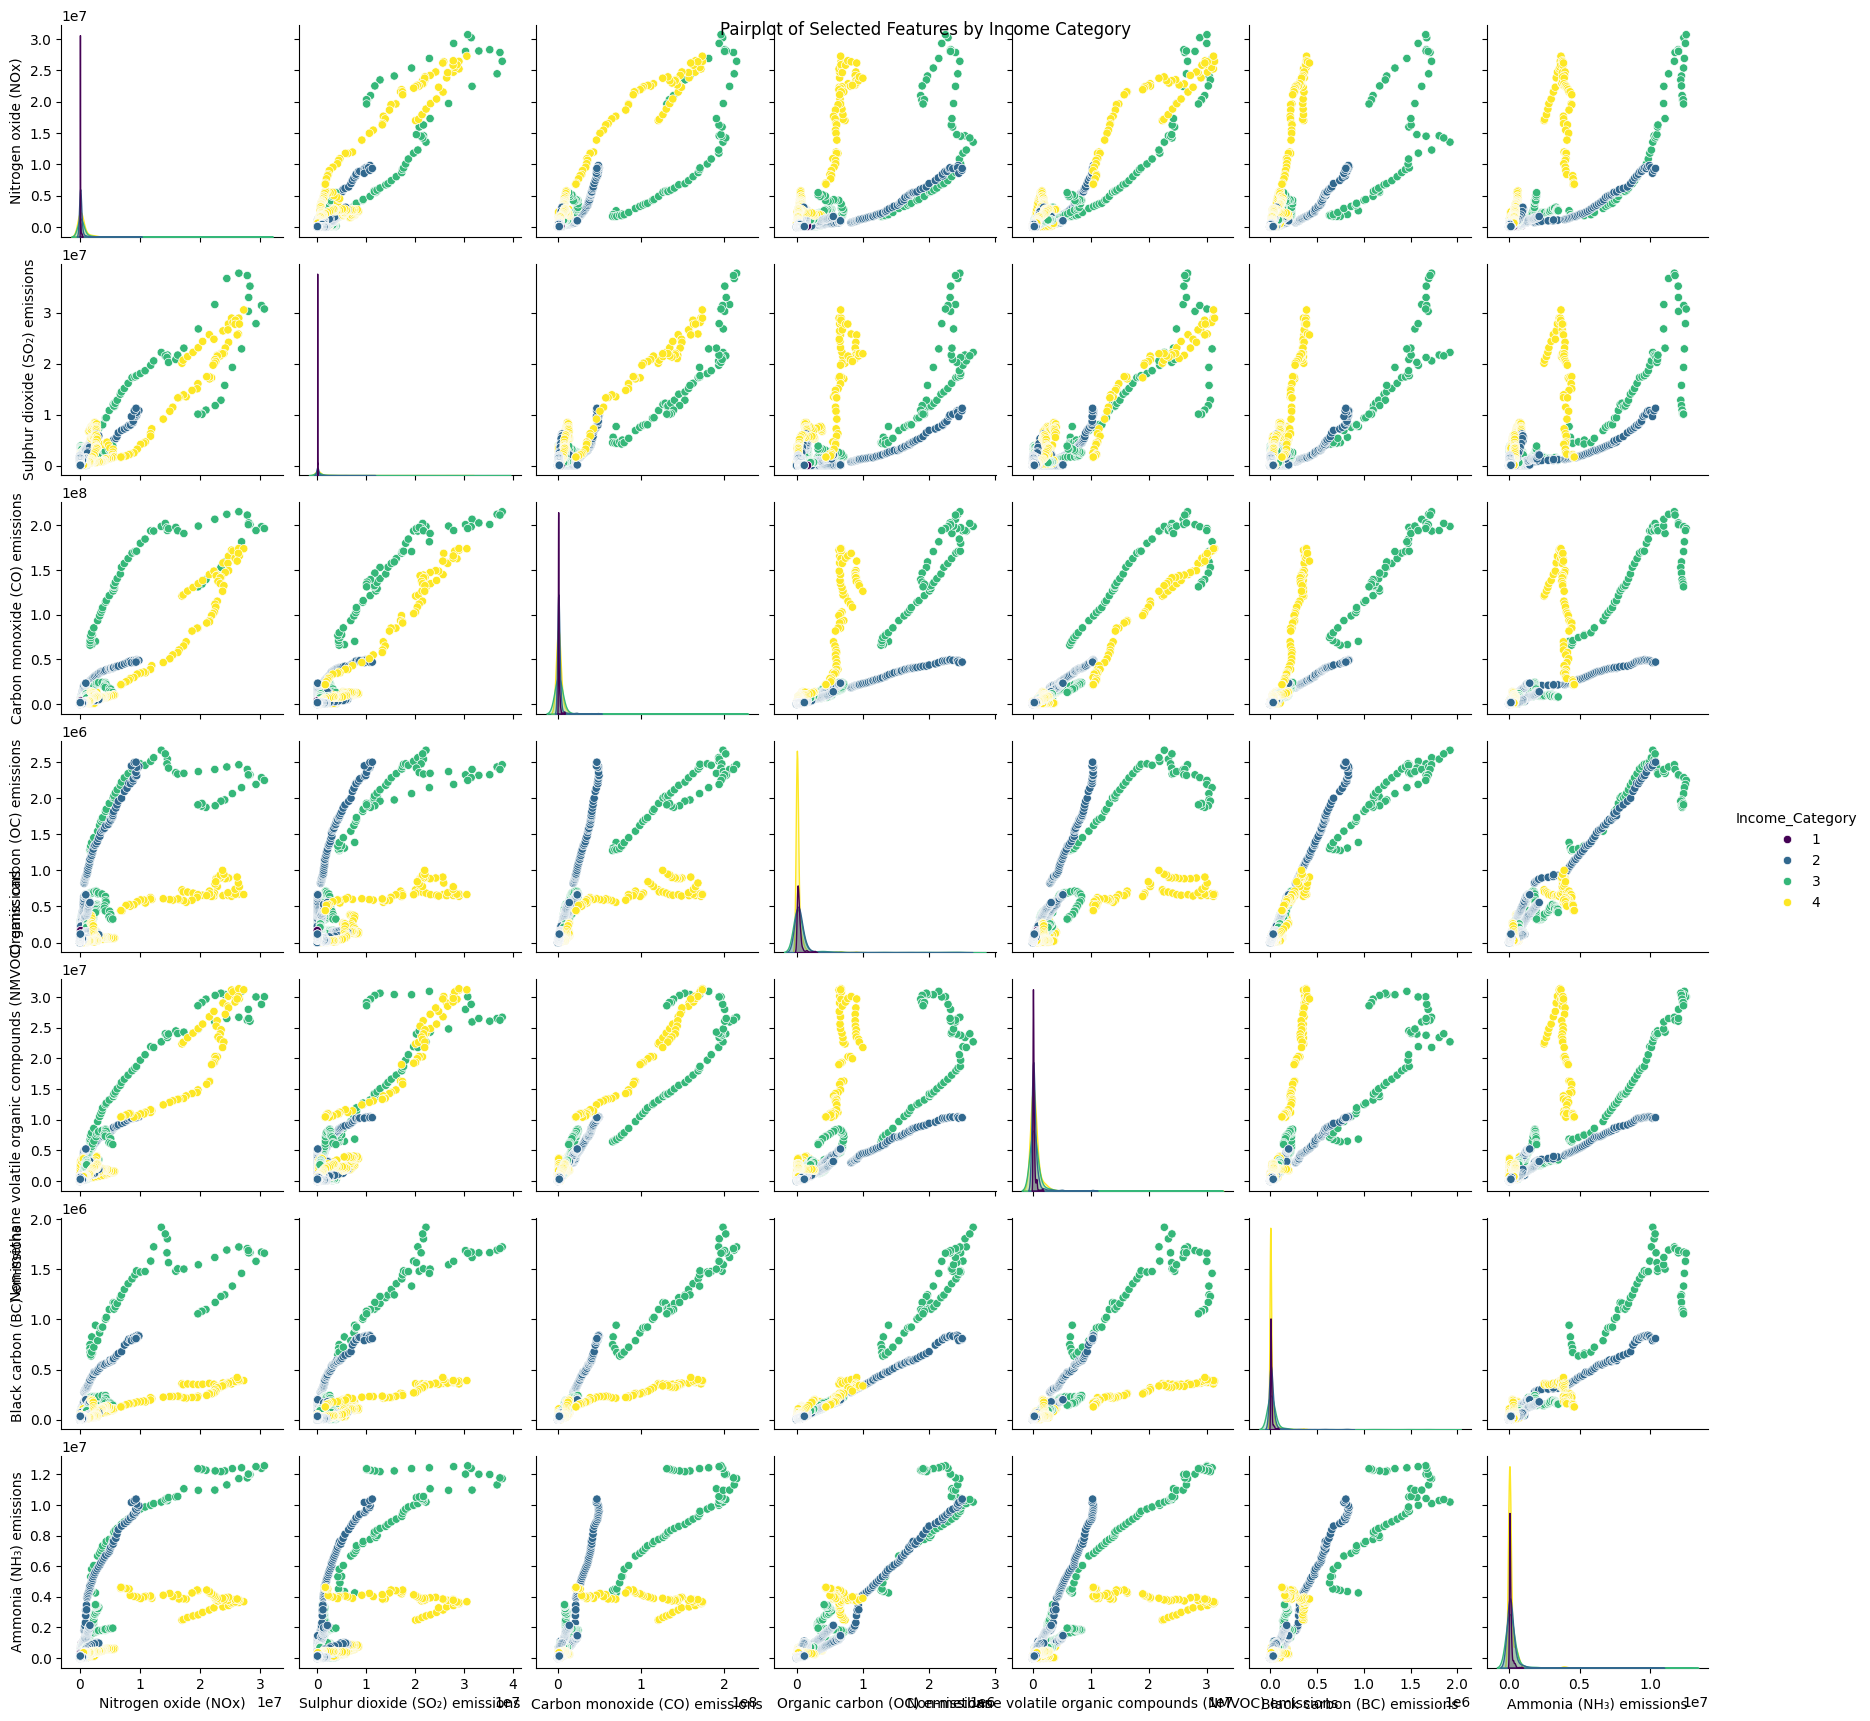

In [51]:
selected_features = ['Nitrogen oxide (NOx)', 'Sulphur dioxide (SO₂) emissions', 'Carbon monoxide (CO) emissions',
                     'Organic carbon (OC) emissions', 'Non-methane volatile organic compounds (NMVOC) emissions',
                     'Black carbon (BC) emissions', 'Ammonia (NH₃) emissions', 'Income_Category']
sns.pairplot(final_merged_df[selected_features], hue='Income_Category', palette='viridis')
plt.suptitle('Pairplot of Selected Features by Income Category')
plt.show()



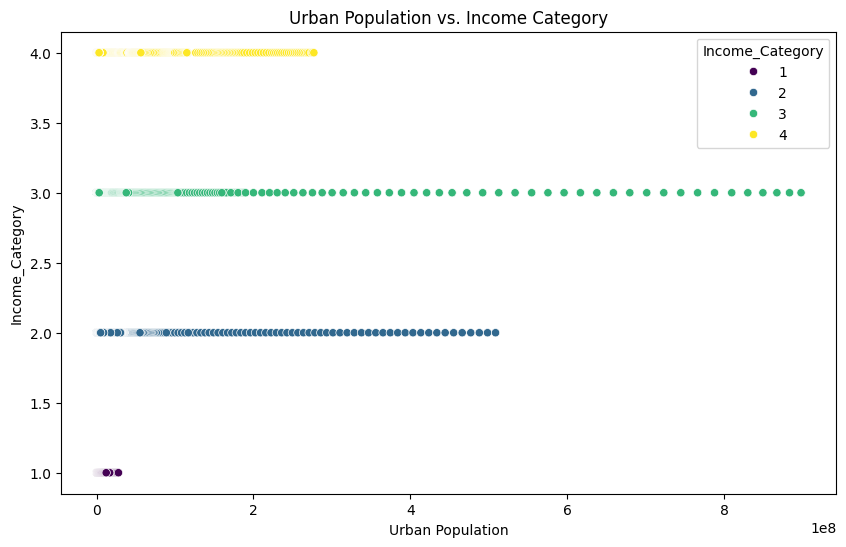

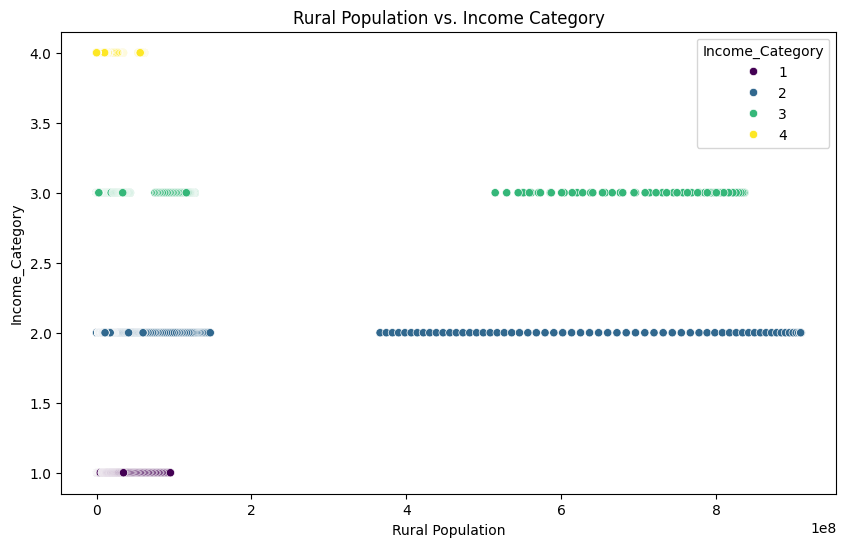

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_merged_df, x='Urban Population', y='Income_Category', hue='Income_Category', palette='viridis')
plt.title('Urban Population vs. Income Category')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_merged_df, x='Rural Population', y='Income_Category', hue='Income_Category', palette='viridis')
plt.title('Rural Population vs. Income Category')
plt.show()


In [53]:
corr_df = aggregated_df.drop(['Entity', 'Code'], axis=1)
correlation_matrix = corr_df.corr()

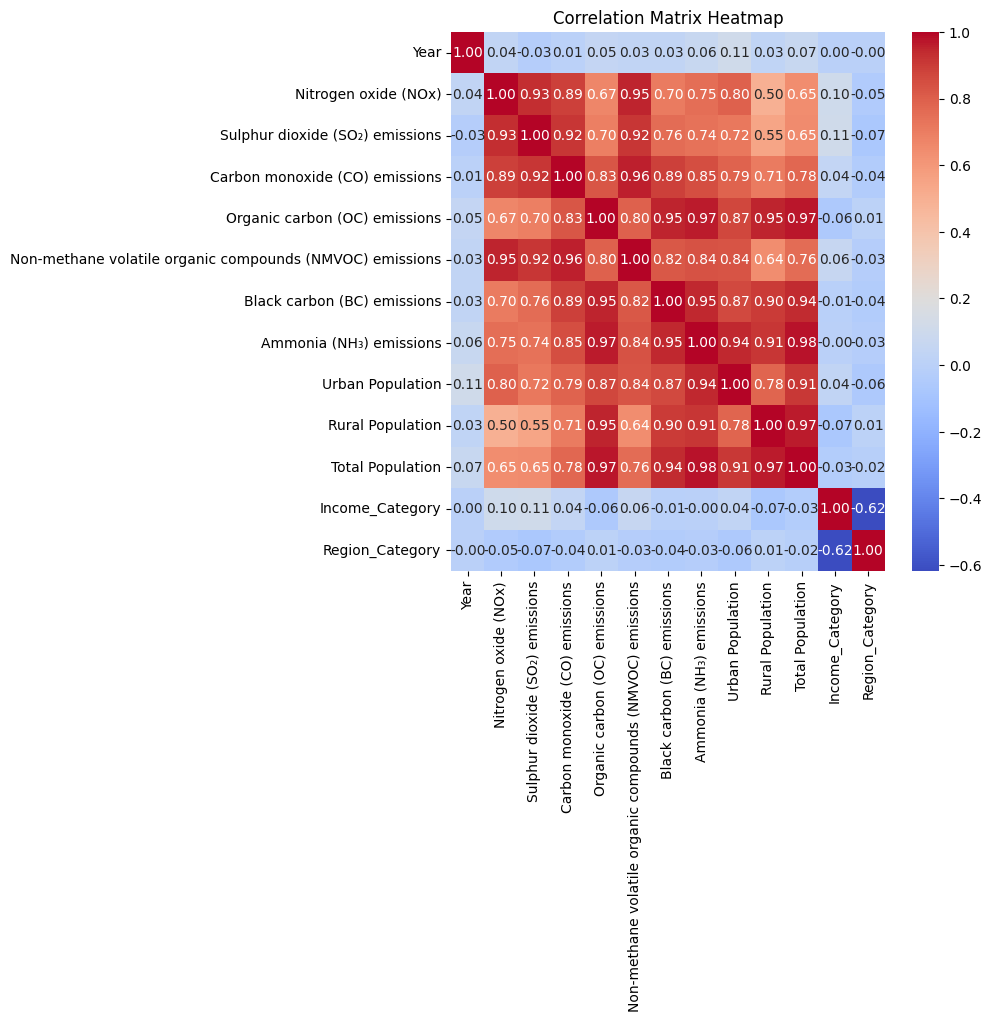

In [56]:
plt.figure(figsize=(7,7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

#Desision Tree Classification for Income Category

In [57]:
aggregated_df['Income_Category'].unique()

array([1, 3, 2, 4])

In [58]:
aggregated_df.columns

Index(['Entity', 'Code', 'Year', 'Nitrogen oxide (NOx)',
       'Sulphur dioxide (SO₂) emissions', 'Carbon monoxide (CO) emissions',
       'Organic carbon (OC) emissions',
       'Non-methane volatile organic compounds (NMVOC) emissions',
       'Black carbon (BC) emissions', 'Ammonia (NH₃) emissions',
       'Urban Population', 'Rural Population', 'Total Population',
       'Income_Category', 'Region_Category'],
      dtype='object')

In [59]:
# Defining features (predictor variables) and target variable
features = [
       'Code', 'Year', 'Nitrogen oxide (NOx)',
       'Sulphur dioxide (SO₂) emissions', 'Carbon monoxide (CO) emissions',
       'Organic carbon (OC) emissions',
       'Non-methane volatile organic compounds (NMVOC) emissions',
       'Black carbon (BC) emissions', 'Ammonia (NH₃) emissions',
       'Urban Population', 'Rural Population', 'Total Population'
]

target = 'Income_Category'

In [60]:
X = aggregated_df.drop(columns=['Income_Category','Region_Category','Entity'])
y = aggregated_df['Income_Category']

In [61]:
X['Code'] = X['Code'].astype('category')

In [62]:
# Splitting the dataset into training (75%) and testing sets (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)

In [63]:
# One-hot encoding for categorical variables
X_train_encoded = pd.get_dummies(X_train, columns=['Code'])
X_test_encoded = pd.get_dummies(X_test, columns=['Code'])

In [64]:
# Fit the Decision Tree classifier on the training data
tree_incomeCategory = DecisionTreeClassifier(random_state=17)

In [65]:
tree_incomeCategory.fit(X_train_encoded, y_train)

DecisionTreeClassifier(random_state=17)

In [66]:
# Making predictions
y_pred = tree_incomeCategory.predict(X_test_encoded)
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9925531914893617
Confusion Matrix:
 [[ 354    1    0    0]
 [   3  693    5    1]
 [   0    0  718    4]
 [   0    3    4 1034]]
Classification Report:
               precision    recall  f1-score   support

           1       0.99      1.00      0.99       355
           2       0.99      0.99      0.99       702
           3       0.99      0.99      0.99       722
           4       1.00      0.99      0.99      1041

    accuracy                           0.99      2820
   macro avg       0.99      0.99      0.99      2820
weighted avg       0.99      0.99      0.99      2820



In [67]:
#Finding most important variable

importance = tree_incomeCategory.feature_importances_
features = X_train_encoded.columns

# Create a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the most important predictor
most_important_predictor = feature_importance_df.iloc[0]['Feature']
print("Most Important Predictor:", most_important_predictor)
print(feature_importance_df)

Most Important Predictor: Rural Population
                             Feature  Importance
9                   Rural Population    0.229636
2    Sulphur dioxide (SO₂) emissions    0.128846
1               Nitrogen oxide (NOx)    0.045849
3     Carbon monoxide (CO) emissions    0.040650
4      Organic carbon (OC) emissions    0.027046
..                               ...         ...
89                          Code_IRL    0.000000
27                          Code_BGD    0.000000
87                          Code_IDN    0.000000
29                          Code_BHR    0.000000
112                         Code_MDA    0.000000

[190 rows x 2 columns]


In [68]:
# Print the top 20 most important features
top_20_features = feature_importance_df.head(20)
print("Top 20 Important Features:")
print(top_20_features)

Top 20 Important Features:
                                               Feature  Importance
9                                     Rural Population    0.229636
2                      Sulphur dioxide (SO₂) emissions    0.128846
1                                 Nitrogen oxide (NOx)    0.045849
3                       Carbon monoxide (CO) emissions    0.040650
4                        Organic carbon (OC) emissions    0.027046
5    Non-methane volatile organic compounds (NMVOC)...    0.025020
116                                           Code_MHL    0.014314
56                                            Code_DMA    0.013299
142                                           Code_PLW    0.012873
102                                           Code_LBN    0.011662
146                                           Code_PRT    0.010841
7                              Ammonia (NH₃) emissions    0.010830
64                                            Code_ETH    0.010736
153                                

In [70]:
importance.shape

(190,)

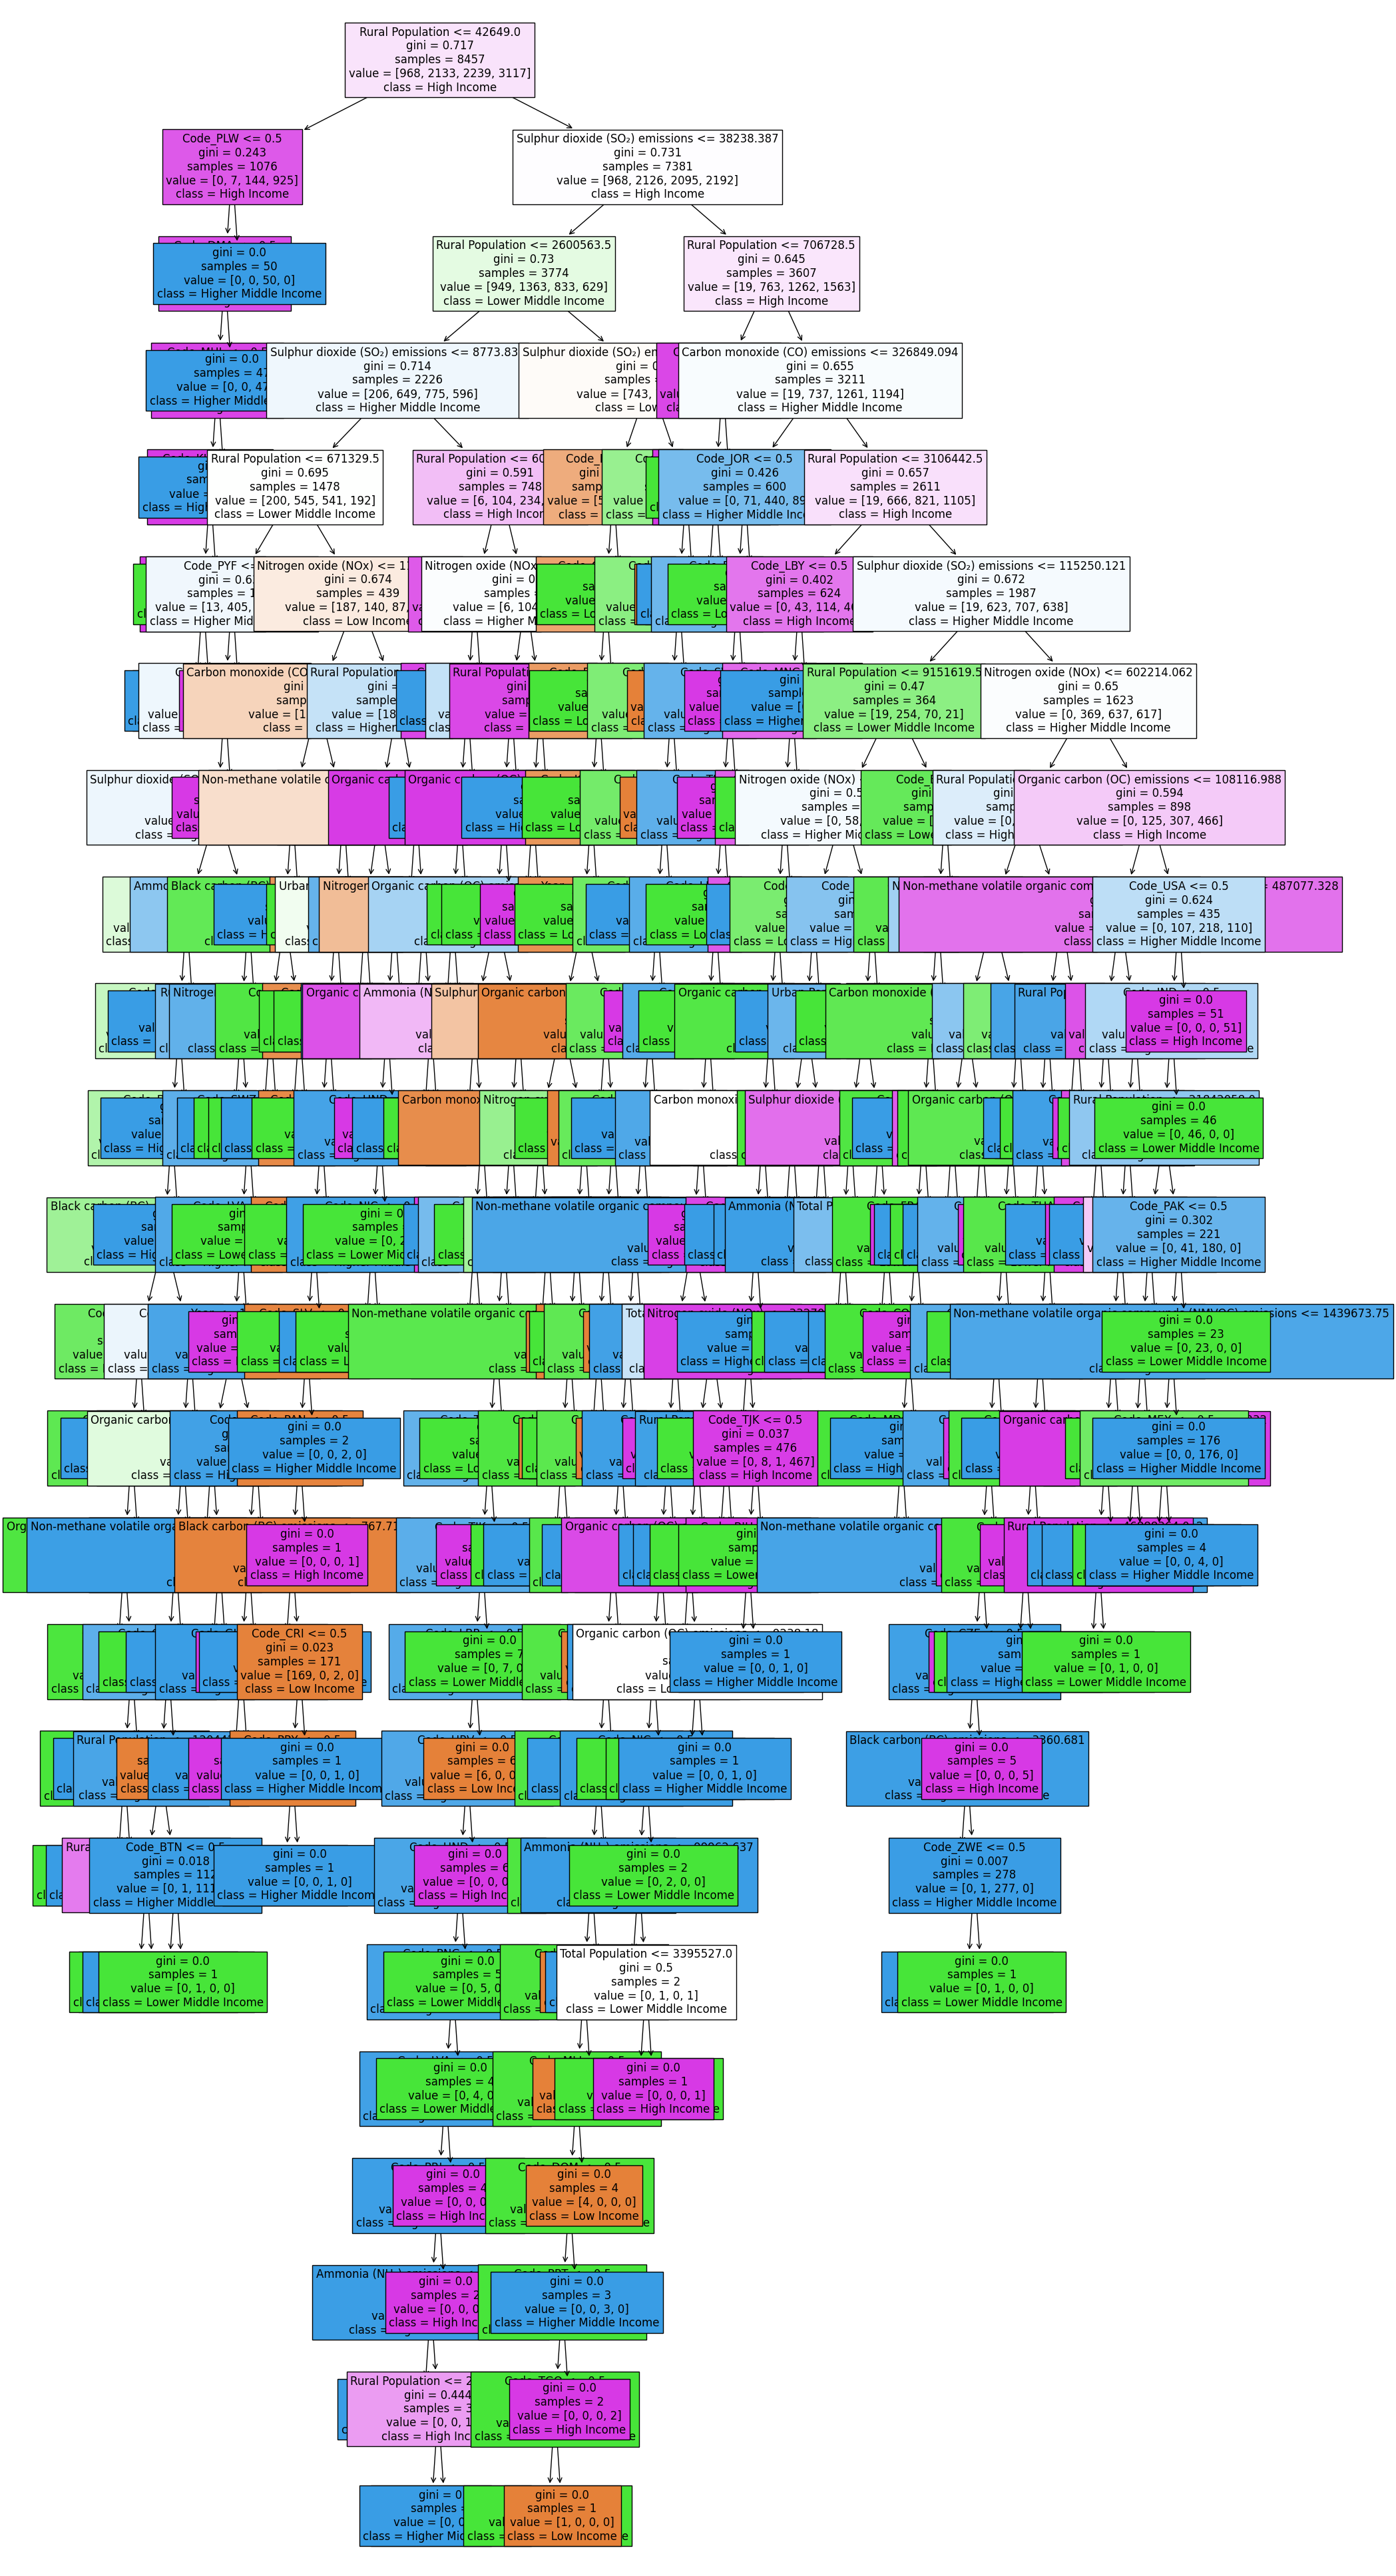

In [71]:

plt.figure(figsize=(21,50))
plot_tree(tree_incomeCategory, filled=True
          , feature_names=X_test_encoded.columns
          , class_names=['Low Income', 'Lower Middle Income', 'Higher Middle Income','High Income', ]
          , label='all'
          , fontsize=12)
plt.show()

In [72]:
tree_summary = export_text(tree_incomeCategory, feature_names=X_train_encoded.columns.tolist())
print(tree_summary)

|--- Rural Population <= 42649.00
|   |--- Code_PLW <= 0.50
|   |   |--- Code_DMA <= 0.50
|   |   |   |--- Code_MHL <= 0.50
|   |   |   |   |--- Code_KIR <= 0.50
|   |   |   |   |   |--- Code_BLZ <= 0.50
|   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |--- Code_BLZ >  0.50
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |--- Code_KIR >  0.50
|   |   |   |   |   |--- class: 2
|   |   |   |--- Code_MHL >  0.50
|   |   |   |   |--- class: 3
|   |   |--- Code_DMA >  0.50
|   |   |   |--- class: 3
|   |--- Code_PLW >  0.50
|   |   |--- class: 3
|--- Rural Population >  42649.00
|   |--- Sulphur dioxide (SO₂) emissions <= 38238.39
|   |   |--- Rural Population <= 2600563.50
|   |   |   |--- Sulphur dioxide (SO₂) emissions <= 8773.84
|   |   |   |   |--- Rural Population <= 671329.50
|   |   |   |   |   |--- Code_PYF <= 0.50
|   |   |   |   |   |   |--- Code_BRB <= 0.50
|   |   |   |   |   |   |   |--- Sulphur dioxide (SO₂) emissions <= 2517.26
|   |   |   |   |   |   |   |   

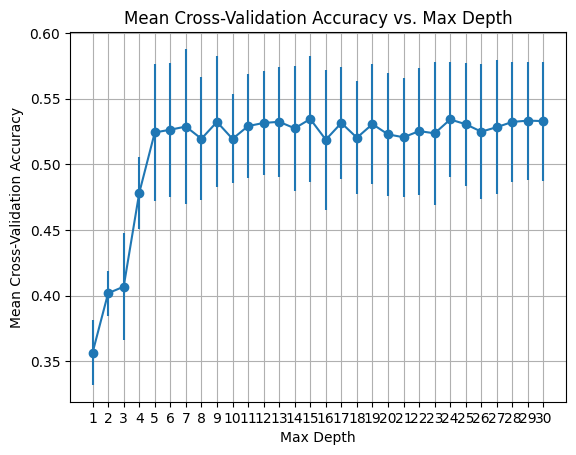

Optimal Max Depth: 15


In [73]:

X_encoded = pd.get_dummies(X, columns=['Code'])

# Define a range of tree depths to explore
max_depths = range(1, 31)

# Initialize lists to store cross-validation scores
cv_scores_mean = []
cv_scores_std = []

# Loop through each max_depth value and perform cross-validation
for depth in max_depths:
    tree_incomeCategory = DecisionTreeClassifier(max_depth=depth, random_state=17)
    scores = cross_val_score(tree_incomeCategory, X_encoded, y, cv=5)
    cv_scores_mean.append(np.mean(scores))
    cv_scores_std.append(np.std(scores))

# Plot the mean cross-validation scores with error bars
plt.errorbar(max_depths, cv_scores_mean, yerr=cv_scores_std, fmt='-o')
plt.xlabel('Max Depth')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('Mean Cross-Validation Accuracy vs. Max Depth')
plt.xticks(max_depths)
plt.grid(True)
plt.show()

# Find the optimal max_depth based on cross-validation scores
optimal_max_depth = max_depths[np.argmax(cv_scores_mean)]
print("Optimal Max Depth:", optimal_max_depth)


In [74]:
optimal_max_depth

15

In [75]:
# Initialize and train the Decision Tree Classifier with optimal depth that is 15
tree_incomeCategory_opt_max_depth = DecisionTreeClassifier(max_depth=optimal_max_depth, random_state=17)
tree_incomeCategory_opt_max_depth.fit(X_train_encoded, y_train)

DecisionTreeClassifier(max_depth=15, random_state=17)

Accuracy: 0.9698581560283688


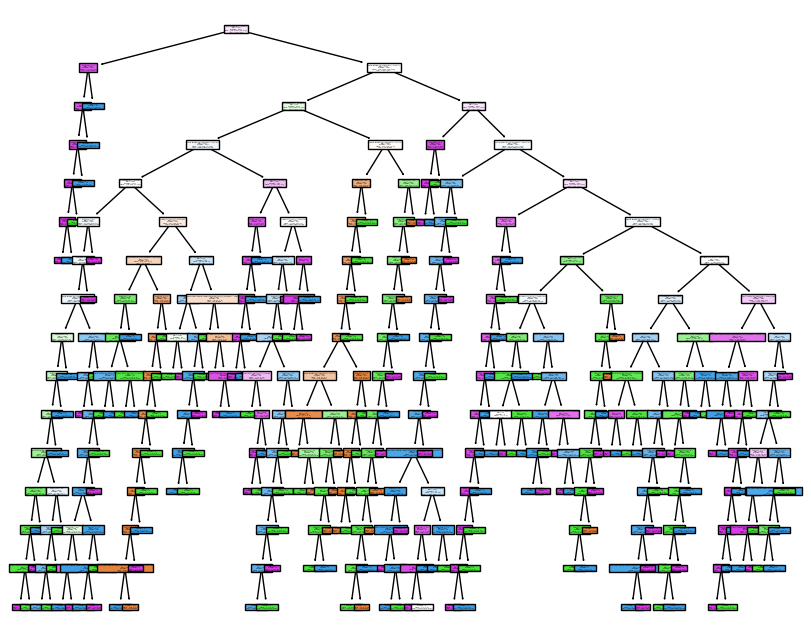

In [78]:
# Making predictions
y_pred_opt = tree_incomeCategory_opt_max_depth.predict(X_test_encoded)

# Evaluating the model
accuracy_opt = accuracy_score(y_test, y_pred_opt)
print("Accuracy:", accuracy_opt)

# Plotting the decision tree
plt.figure(figsize=(10,8))
plot_tree(tree_incomeCategory_opt_max_depth, feature_names=features, class_names=['Low Income', 'Lower Middle Income', 'Higher Middle Income','High Income'], filled=True)
plt.show()

Accuracy: 0.9698581560283688


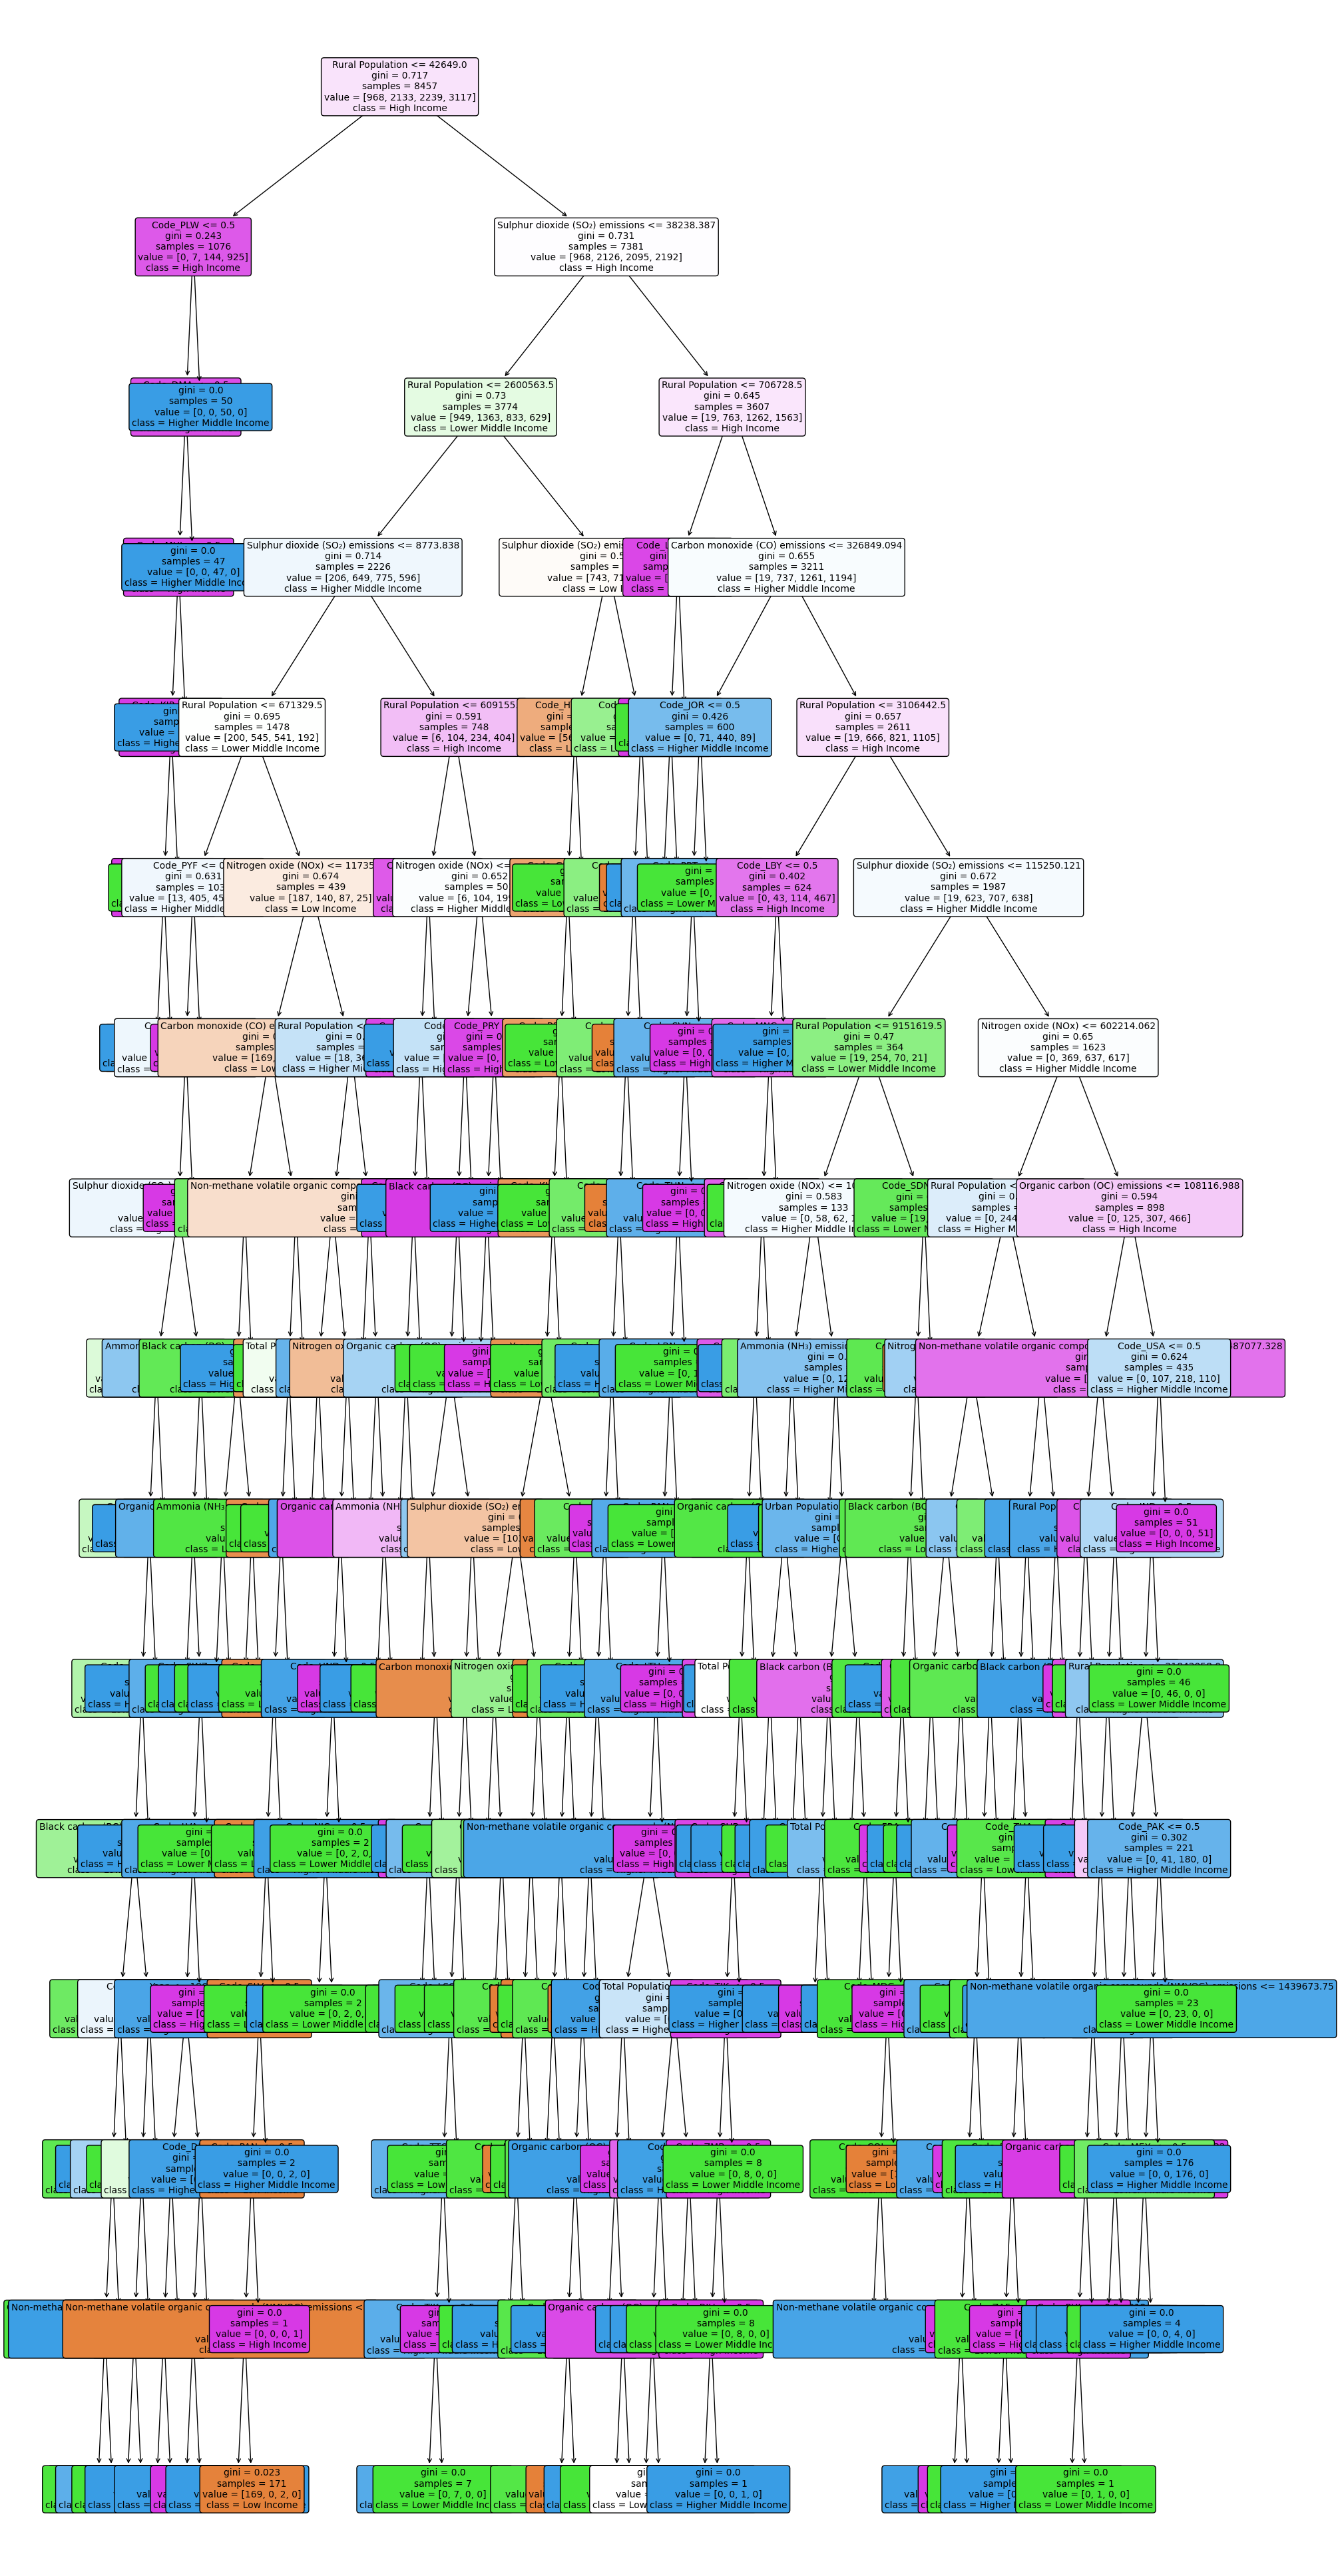

In [79]:
# Prediction and accuracy of Decision tree with optimal max_depth of 15
y_pred_opt = tree_incomeCategory_opt_max_depth.predict(X_test_encoded)

accuracy_opt = accuracy_score(y_test, y_pred_opt)
print("Accuracy:", accuracy_opt)

plt.figure(figsize=(21, 50))
plot_tree(tree_incomeCategory_opt_max_depth,
          feature_names=features,
          class_names=['Low Income', 'Lower Middle Income', 'Higher Middle Income', 'High Income'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()


In [80]:
# Create confusion matrix
confusion_matrix_pruned = pd.crosstab(index=y_pred_opt, columns=y_test, rownames=['Predicted'], colnames=['Actual'])
print("\nConfusion Matrix:\n", confusion_matrix_pruned)


Confusion Matrix:
 Actual       1    2    3     4
Predicted                     
1          329    3    1     0
2           17  689    7     5
3            9    9  711    30
4            0    1    3  1006


In [81]:
#Finding most important variable

importance = tree_incomeCategory_opt_max_depth.feature_importances_
features = X_train_encoded.columns

# Create a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the most important predictor
most_important_predictor = feature_importance_df.iloc[0]['Feature']
print("Most Important Predictor:", most_important_predictor)
print(feature_importance_df)

Most Important Predictor: Rural Population
                             Feature  Importance
9                   Rural Population    0.232725
2    Sulphur dioxide (SO₂) emissions    0.132763
1               Nitrogen oxide (NOx)    0.044657
3     Carbon monoxide (CO) emissions    0.040138
4      Organic carbon (OC) emissions    0.025835
..                               ...         ...
27                          Code_BGD    0.000000
82                          Code_GUY    0.000000
81                          Code_GUM    0.000000
79                          Code_GRL    0.000000
189                         Code_ZWE    0.000000

[190 rows x 2 columns]


In [82]:
# Print the top 20 most important features
top_20_features = feature_importance_df.head(20)
print("Top 20 Important Features:")
print(top_20_features)

Top 20 Important Features:
                                               Feature  Importance
9                                     Rural Population    0.232725
2                      Sulphur dioxide (SO₂) emissions    0.132763
1                                 Nitrogen oxide (NOx)    0.044657
3                       Carbon monoxide (CO) emissions    0.040138
4                        Organic carbon (OC) emissions    0.025835
5    Non-methane volatile organic compounds (NMVOC)...    0.025346
116                                           Code_MHL    0.014841
56                                            Code_DMA    0.013789
7                              Ammonia (NH₃) emissions    0.013523
142                                           Code_PLW    0.013347
102                                           Code_LBN    0.012091
153                                           Code_SDN    0.011600
64                                            Code_ETH    0.011343
6                          Black ca

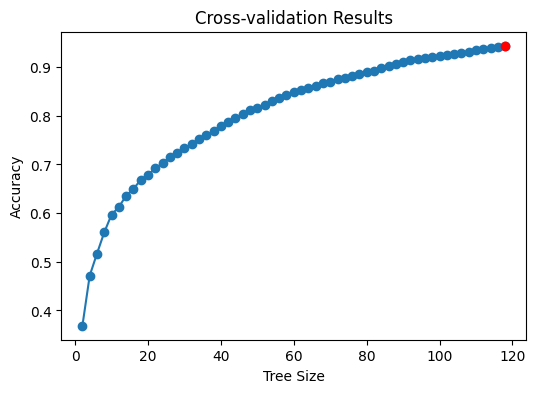

In [83]:
# Cross-validation for max_leaf_nodes
# Initialize decision tree model
tree_incomeCategory = DecisionTreeClassifier(random_state=17)

# Define parameters for cross-validation
params = {'max_leaf_nodes': range(2, 120, 2)}

# Perform cross-validation to determine optimal tree size
cv_incomeCategory = GridSearchCV(tree_incomeCategory, params, cv=10)
cv_incomeCategory.fit(X_train_encoded, y_train)
cv_results = cv_incomeCategory.cv_results_

# Find the best score and corresponding tree size
best_size = cv_incomeCategory.best_params_['max_leaf_nodes']
best_score = cv_incomeCategory.best_score_

# Plot the results of cross-validation
plt.figure(figsize=(6, 4))
plt.plot(cv_results["param_max_leaf_nodes"], cv_results["mean_test_score"], 'o-')
plt.plot(best_size, best_score, 'ro-')
plt.xlabel('Tree Size')
plt.ylabel('Accuracy')
plt.title('Cross-validation Results')
plt.show()

In [84]:
best_size

118

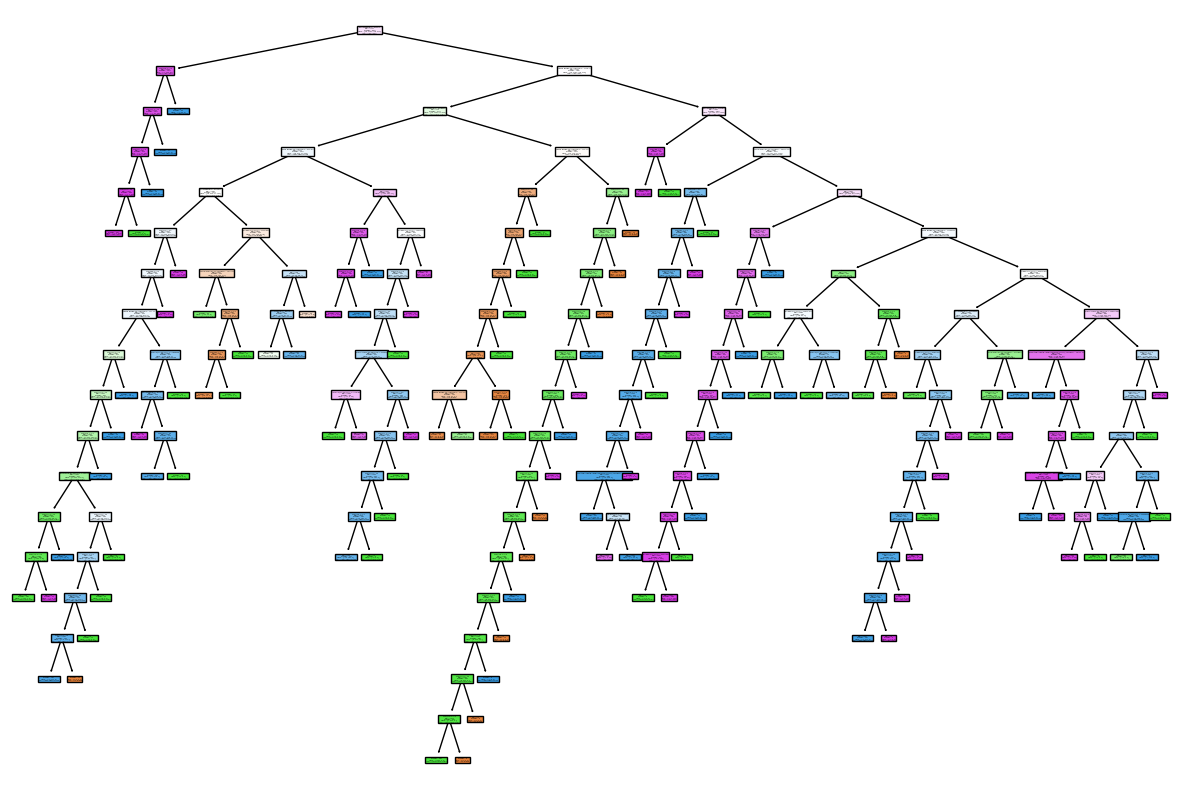

In [85]:
# Prune tree using optimal size
prune_incomeCategory = DecisionTreeClassifier(max_leaf_nodes=best_size, random_state=17)
prune_incomeCategory.fit(X_train_encoded, y_train)

# Plot pruned tree
plt.figure(figsize=(15,10))
plt.title('Pruned Tree')
plot_tree(prune_incomeCategory, feature_names=X_train_encoded.columns, class_names=['Low Income', 'Lower Middle Income', 'Higher Middle Income','High Income'], filled=True)
plt.show()

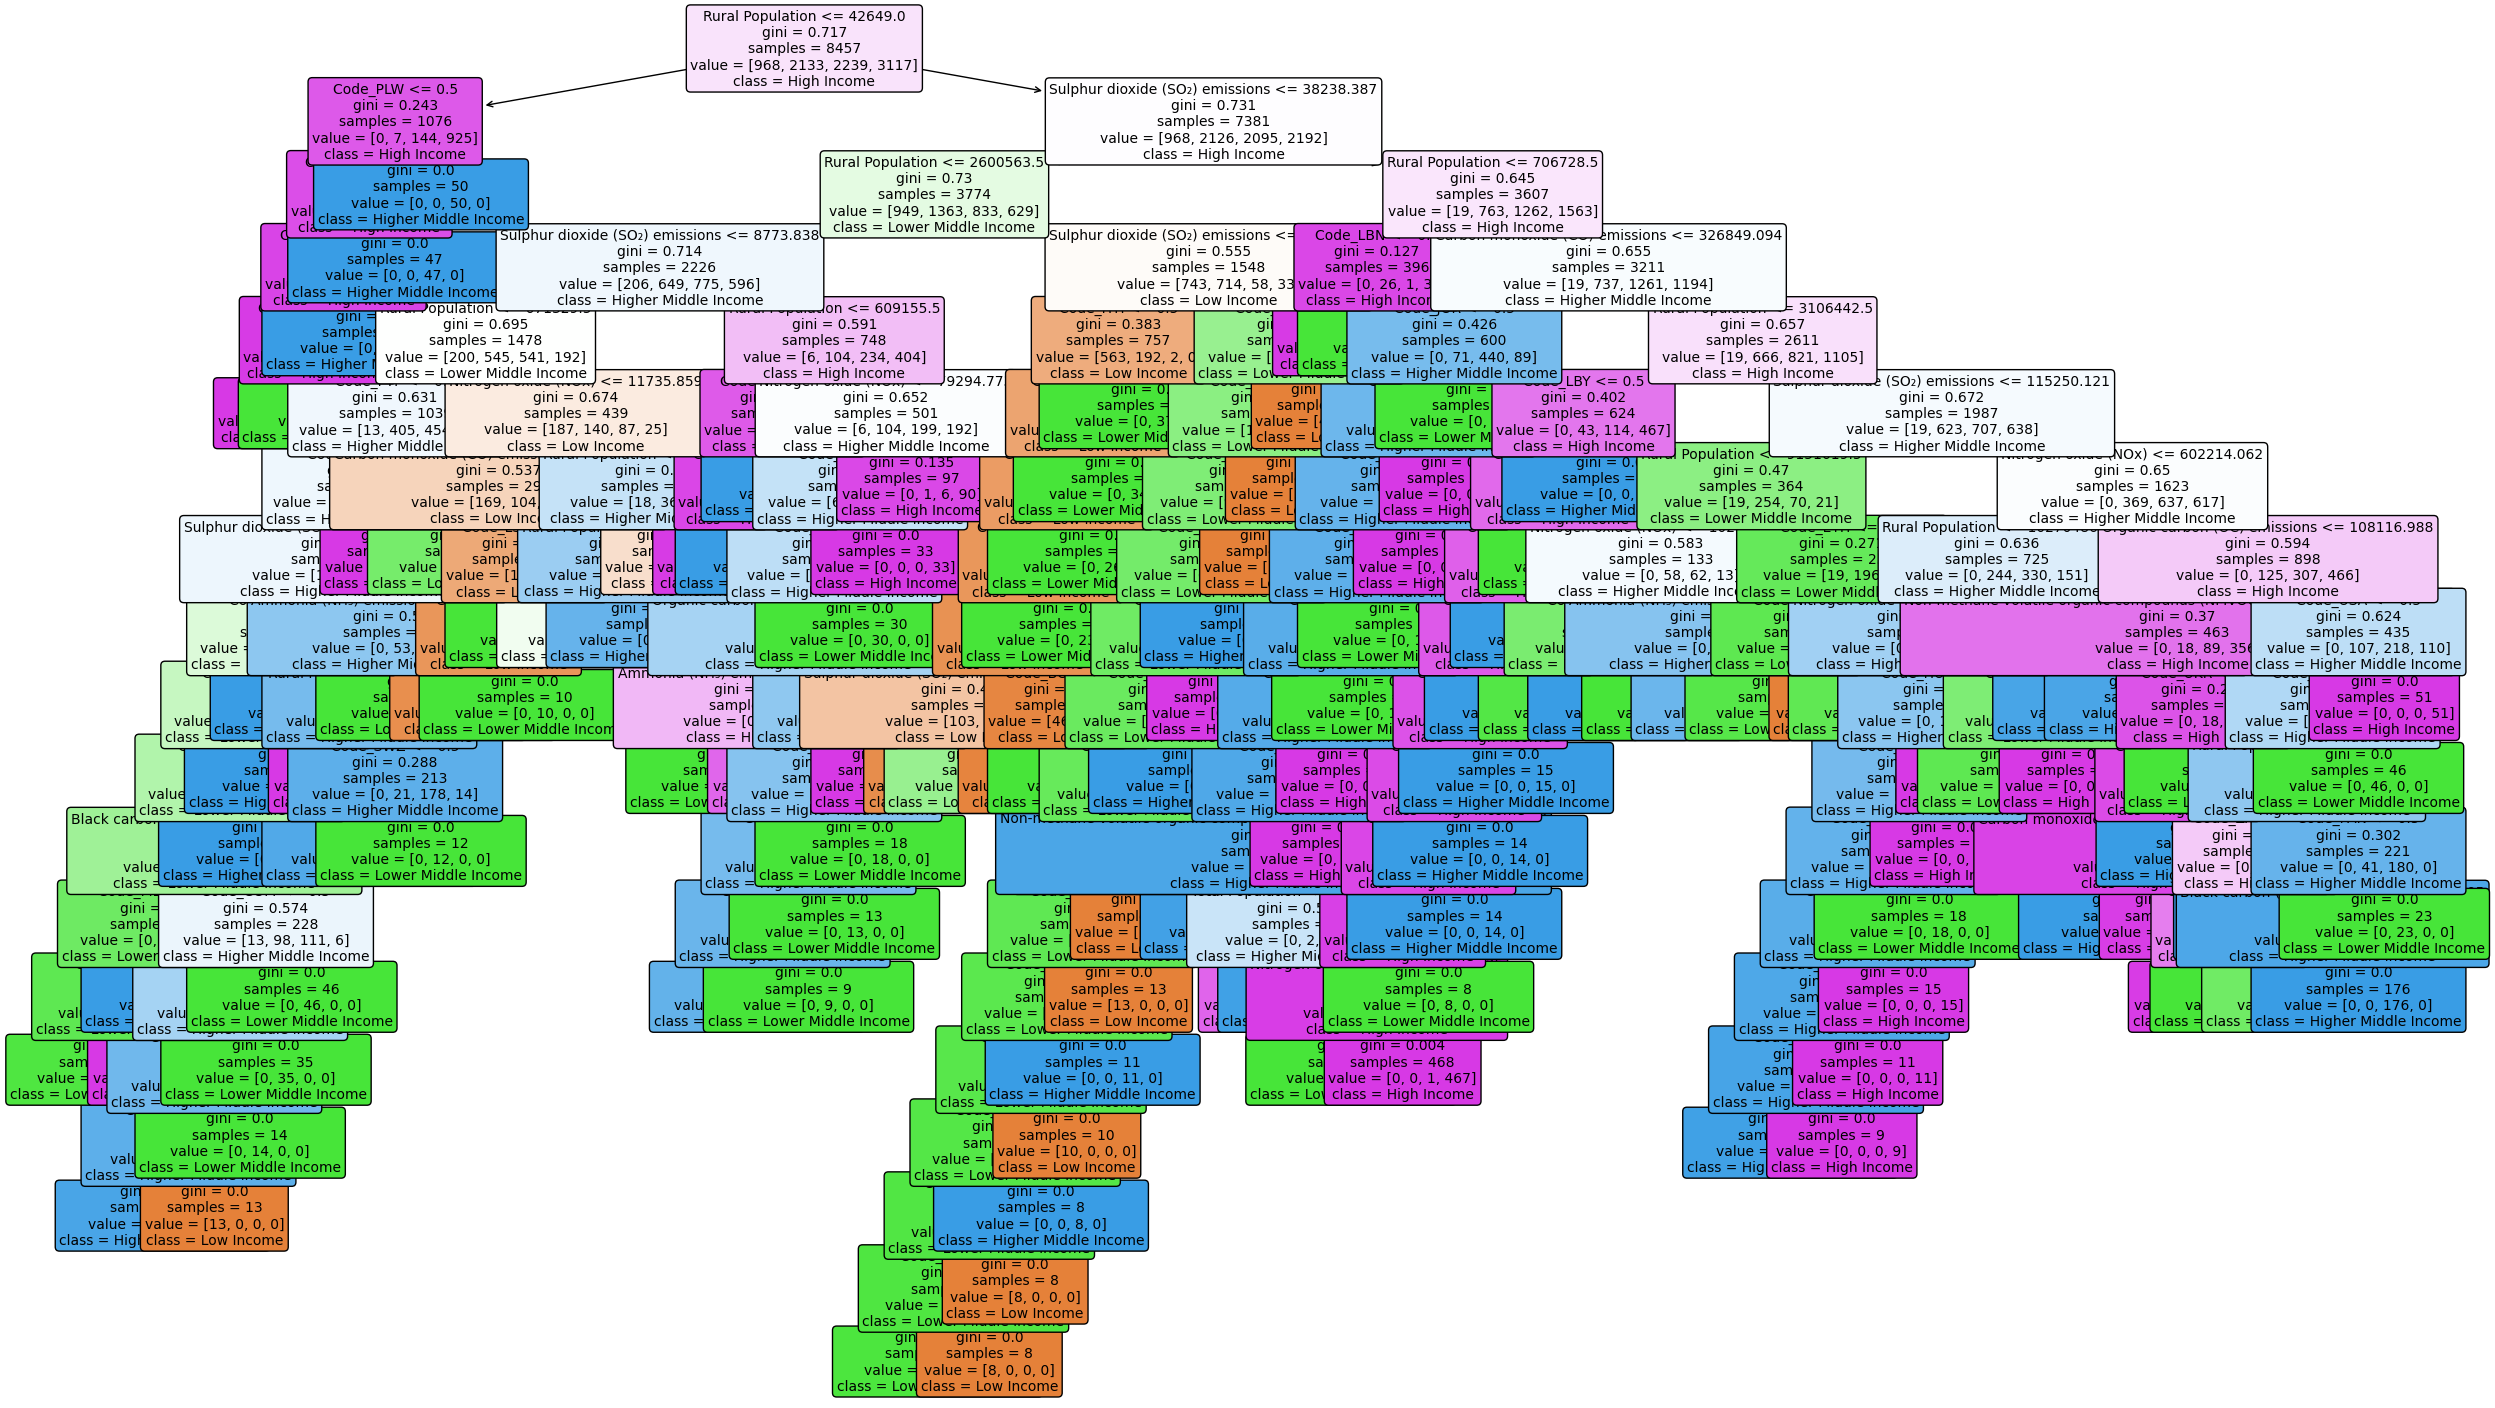

In [86]:
plt.figure(figsize=(30, 18))
plt.title('Pruned Tree', fontsize=10)
plot_tree(
    prune_incomeCategory,
    feature_names=X_train_encoded.columns,
    class_names=['Low Income', 'Lower Middle Income', 'Higher Middle Income', 'High Income'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()


In [87]:
# Obtain predicted labels for the test set
y_pred_pruned = prune_incomeCategory.predict(X_test_encoded)

# Calculate accuracy
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print("Accuracy of Pruned Tree:", accuracy_pruned)

# Create confusion matrix
confusion_matrix_pruned = pd.crosstab(index=y_pred_pruned, columns=y_test, rownames=['Predicted'], colnames=['Actual'])
print("\nConfusion Matrix:\n", confusion_matrix_pruned)

Accuracy of Pruned Tree: 0.9418439716312057

Confusion Matrix:
 Actual       1    2    3    4
Predicted                    
1          347   13    2    5
2            5  657   23   20
3            3   28  689   53
4            0    4    8  963


In [88]:
#Finding most important variable

importance = prune_incomeCategory.feature_importances_
features = X_train_encoded.columns

# Create a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the most important predictor
most_important_predictor = feature_importance_df.iloc[0]['Feature']
print("Most Important Predictor:", most_important_predictor)
print(feature_importance_df)

Most Important Predictor: Rural Population
                             Feature  Importance
9                   Rural Population    0.249176
2    Sulphur dioxide (SO₂) emissions    0.142708
1               Nitrogen oxide (NOx)    0.046771
3     Carbon monoxide (CO) emissions    0.044533
4      Organic carbon (OC) emissions    0.020693
..                               ...         ...
96                          Code_JPN    0.000000
44                          Code_CIV    0.000000
94                          Code_JAM    0.000000
93                          Code_ITA    0.000000
189                         Code_ZWE    0.000000

[190 rows x 2 columns]


In [89]:
# Print the top 20 most important features
top_20_features = feature_importance_df.head(20)
print("Top 20 Important Features:")
print(top_20_features)

Top 20 Important Features:
                                               Feature  Importance
9                                     Rural Population    0.249176
2                      Sulphur dioxide (SO₂) emissions    0.142708
1                                 Nitrogen oxide (NOx)    0.046771
3                       Carbon monoxide (CO) emissions    0.044533
4                        Organic carbon (OC) emissions    0.020693
5    Non-methane volatile organic compounds (NMVOC)...    0.016160
116                                           Code_MHL    0.015952
56                                            Code_DMA    0.014822
142                                           Code_PLW    0.014346
7                              Ammonia (NH₃) emissions    0.013492
102                                           Code_LBN    0.012641
6                          Black carbon (BC) emissions    0.012022
64                                            Code_ETH    0.011965
153                                

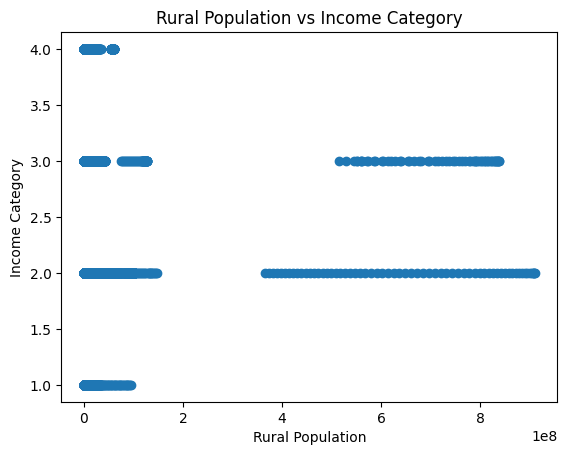

In [90]:
# Scatter plot of Rural Population and Income
plt.scatter(aggregated_df['Rural Population'], aggregated_df['Income_Category'])
plt.xlabel('Rural Population')
plt.ylabel('Income Category')
plt.title('Rural Population vs Income Category')
plt.show()

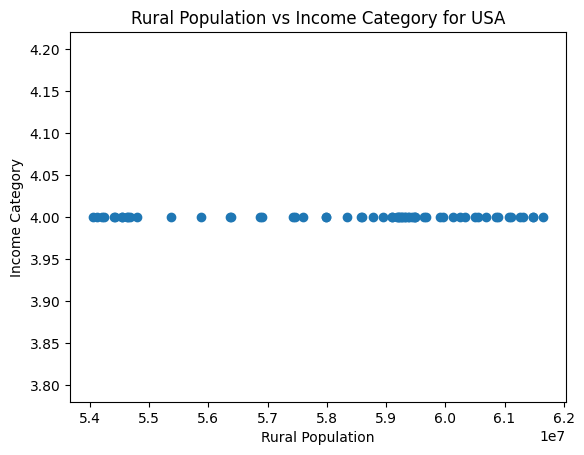

In [91]:
# Filter the DataFrame for the country with Code 'USA'
usa_data = aggregated_df[aggregated_df['Code'] == 'USA']

# Plotting the scatter plot
plt.scatter(usa_data['Rural Population'], usa_data['Income_Category'])
plt.xlabel('Rural Population')
plt.ylabel('Income Category')
plt.title('Rural Population vs Income Category for USA')
plt.show()

In [92]:
# List of top 20 features
top_20_feature_names = top_20_features['Feature'].tolist()
print(top_20_feature_names)

['Rural Population', 'Sulphur dioxide (SO₂) emissions', 'Nitrogen oxide (NOx)', 'Carbon monoxide (CO) emissions', 'Organic carbon (OC) emissions', 'Non-methane volatile organic compounds (NMVOC) emissions', 'Code_MHL', 'Code_DMA', 'Code_PLW', 'Ammonia (NH₃) emissions', 'Code_LBN', 'Black carbon (BC) emissions', 'Code_ETH', 'Code_SDN', 'Code_ROU', 'Code_PRT', 'Code_MNG', 'Code_UKR', 'Code_HUN', 'Code_BRB']


In [93]:
# Filter the DataFrame to include only the top features and the income categories

selected_df = aggregated_df[['Income_Category', 'Rural Population','Sulphur dioxide (SO₂) emissions', 'Carbon monoxide (CO) emissions', 'Nitrogen oxide (NOx)', 'Organic carbon (OC) emissions','Non-methane volatile organic compounds (NMVOC) emissions']]
# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Extract the correlation of the top 20 features with the income category
correlation_with_income_category = correlation_matrix['Income_Category'].drop('Income_Category')

# Print the correlation values
print("\nCorrelation of Top Features with Income Category:")
print(correlation_with_income_category)




Correlation of Top Features with Income Category:
Rural Population                                           -0.073742
Sulphur dioxide (SO₂) emissions                             0.112639
Carbon monoxide (CO) emissions                              0.040443
Nitrogen oxide (NOx)                                        0.103961
Organic carbon (OC) emissions                              -0.056189
Non-methane volatile organic compounds (NMVOC) emissions    0.061136
Name: Income_Category, dtype: float64


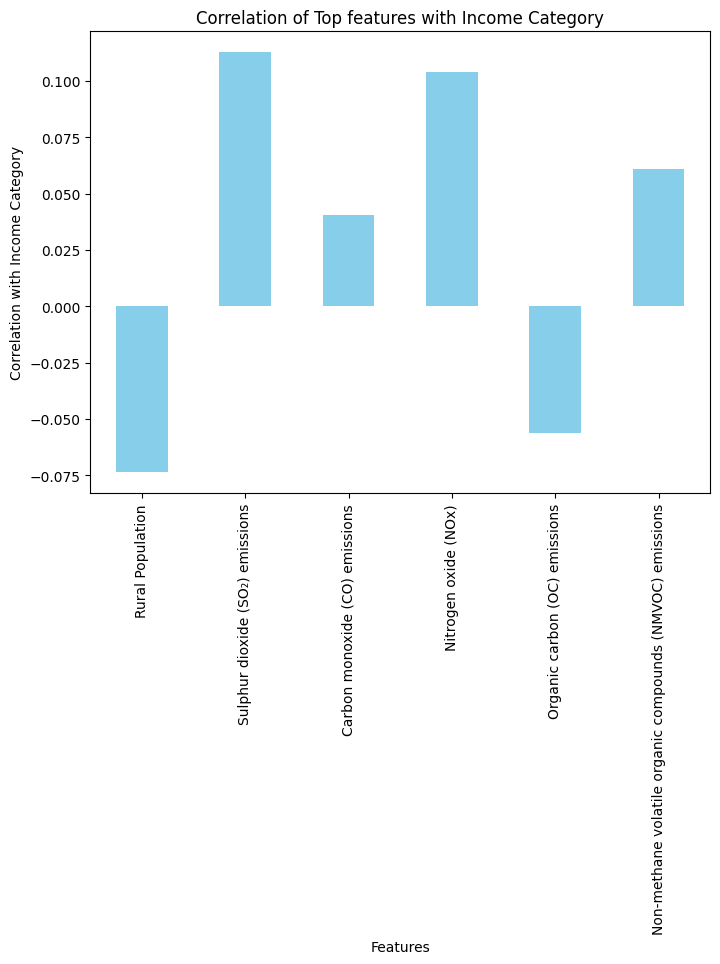

In [95]:
correlation_with_income_category.plot(kind='bar', figsize=(8, 6), color='skyblue')
plt.xlabel('Features')
plt.ylabel('Correlation with Income Category')
plt.title('Correlation of Top features with Income Category')
plt.xticks(rotation=90)
plt.show()

In [96]:
# Ensemble Method for Income Categories- Bagging
# Bagging using Random Forest Regressor

tree_bagging = RandomForestRegressor(max_features=X_train_encoded.shape[1], random_state=17)
tree_bagging.fit(X_train_encoded, y_train)

print("Number of trees:", tree_bagging.n_estimators)
print("Number of features tried at each split:", tree_bagging.max_features)
print("Training score: {:.2f}%".format(tree_bagging.score(X_train_encoded, y_train) * 100))

Number of trees: 100
Number of features tried at each split: 190
Training score: 99.92%


In [97]:
# Predict target values on the training set
y_pred_train = tree_bagging.predict(X_train_encoded)

# Calculate Mean Squared Error on the training set
mse_train = mean_squared_error(y_train, y_pred_train)

print("Mean Squared Error (Training):", mse_train)

Mean Squared Error (Training): 0.0008509282251389375


In [100]:
# Test accuracy
accuracy = 1-mse_train
print("Test Accuracy:", accuracy)


Test Accuracy: 0.999149071774861


In [101]:
# Predict values
y_pred_bag = tree_bagging.predict(X_test_encoded)

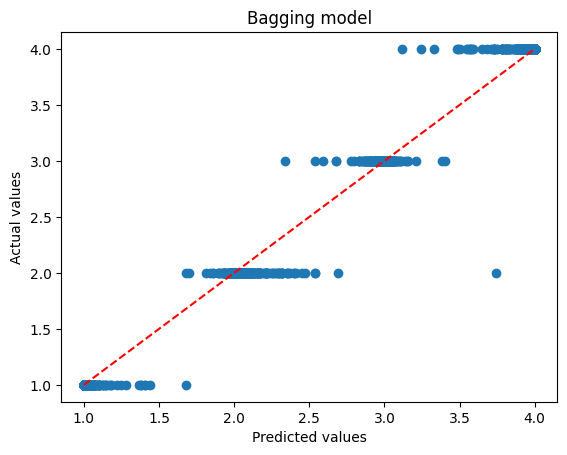

In [102]:
# Plot predicted vs actual values
plt.scatter(y_pred_bag, y_test)
plt.plot([min(y_pred_bag), max(y_pred_bag)], [min(y_pred_bag), max(y_pred_bag)], 'r--')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Bagging model')
plt.show()

In [103]:
# Feature Importance
importance = tree_bagging.feature_importances_
features = X_train_encoded.columns

# Create a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the most important predictor
most_important_predictor = feature_importance_df.iloc[0]['Feature']
print("Most Important Predictor:", most_important_predictor)
print(feature_importance_df)

Most Important Predictor: Sulphur dioxide (SO₂) emissions
                                               Feature  Importance
2                      Sulphur dioxide (SO₂) emissions    0.345036
9                                     Rural Population    0.307404
1                                 Nitrogen oxide (NOx)    0.056145
5    Non-methane volatile organic compounds (NMVOC)...    0.030515
4                        Organic carbon (OC) emissions    0.019250
..                                                 ...         ...
151                                           Code_RWA    0.000000
155                                           Code_SGP    0.000000
11                                            Code_ABW    0.000000
63                                            Code_EST    0.000000
18                                            Code_ASM    0.000000

[190 rows x 2 columns]


Best parameters found:  {'n_estimators': 200}
Mean Squared Error (Test) with Best Parameters: 0.006418324468085106


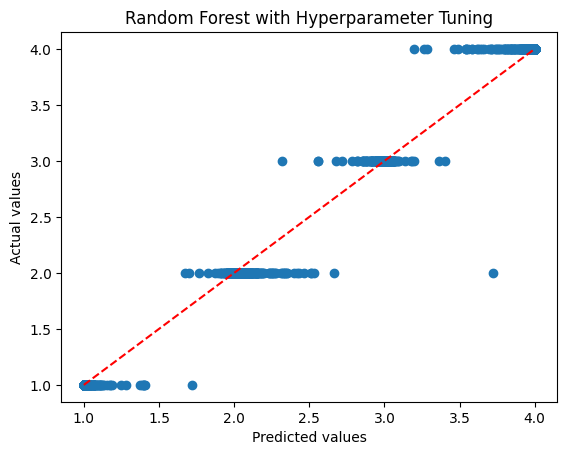

In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
# Cross-validation with n_estimators - Bagging

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    #'max_depth': [10, 20, 30]
}

# Initialize the grid search
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=17),
                           param_grid=param_grid,
                           cv=5)

# Fit the grid search to the data
grid_search.fit(X_train_encoded, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Evaluate the model with the best parameters
best_tree_bagging = grid_search.best_estimator_
y_pred_best = best_tree_bagging.predict(X_test_encoded)
mse_test_best = mean_squared_error(y_test, y_pred_best)
print("Mean Squared Error (Test) with Best Parameters:", mse_test_best)

# Plot the predicted vs actual values
plt.scatter(y_pred_best, y_test)
plt.plot([min(y_pred_best), max(y_pred_best)], [min(y_pred_best), max(y_pred_best)], 'r--')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Random Forest with Hyperparameter Tuning')
plt.show()

In [105]:
accuracy = 1-mse_test_best
print("Testing Accuracy:", accuracy)


Testing Accuracy: 0.9935816755319149


In [106]:
importance = best_tree_bagging.feature_importances_
features = X_train_encoded.columns

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

most_important_predictor = feature_importance_df.iloc[0]['Feature']
print("Most Important Predictor:", most_important_predictor)
print(feature_importance_df)

Most Important Predictor: Sulphur dioxide (SO₂) emissions
                                               Feature  Importance
2                      Sulphur dioxide (SO₂) emissions    0.345777
9                                     Rural Population    0.308784
1                                 Nitrogen oxide (NOx)    0.054950
5    Non-methane volatile organic compounds (NMVOC)...    0.030369
4                        Organic carbon (OC) emissions    0.018172
..                                                 ...         ...
149                                           Code_QAT    0.000000
155                                           Code_SGP    0.000000
11                                            Code_ABW    0.000000
40                                            Code_CAN    0.000000
24                                            Code_BEL    0.000000

[190 rows x 2 columns]


#Region Classification

In [108]:
# Define features (predictor variables) and target variable
features_multi = [
    'Code', 'Year', 'Nitrogen oxide (NOx)',
       'Sulphur dioxide (SO₂) emissions', 'Carbon monoxide (CO) emissions',
       'Organic carbon (OC) emissions',
       'Non-methane volatile organic compounds (NMVOC) emissions',
       'Black carbon (BC) emissions', 'Ammonia (NH₃) emissions',
       'Urban Population', 'Rural Population', 'Total Population'
]

target_multi = 'Region_Category'

In [109]:
aggregated_df.columns


Index(['Entity', 'Code', 'Year', 'Nitrogen oxide (NOx)',
       'Sulphur dioxide (SO₂) emissions', 'Carbon monoxide (CO) emissions',
       'Organic carbon (OC) emissions',
       'Non-methane volatile organic compounds (NMVOC) emissions',
       'Black carbon (BC) emissions', 'Ammonia (NH₃) emissions',
       'Urban Population', 'Rural Population', 'Total Population',
       'Income_Category', 'Region_Category'],
      dtype='object')

In [110]:
# Split the data into features (X) and target variable (y)
X = aggregated_df[features_multi]
y = aggregated_df[target_multi]

In [111]:
X['Code'] = X['Code'].astype('category')

<ipython-input-111-75e4fcc0b1f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Code'] = X['Code'].astype('category')


In [112]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)

In [113]:
# One-hot encoding for categorical variables
X_train_encoded = pd.get_dummies(X_train, columns=['Code'])
X_test_encoded = pd.get_dummies(X_test, columns=['Code'])

In [114]:
# Create a multi-class decision tree model
tree_regionCategory = DecisionTreeClassifier(random_state=17)
tree_regionCategory.fit(X_train_encoded, y_train)

DecisionTreeClassifier(random_state=17)

In [115]:
# Predict the target values on the test set
y_pred = tree_regionCategory.predict(X_test_encoded)

In [116]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9875886524822695
Confusion Matrix:
 [[381   1   2   2   0   0   1]
 [  0 742   8   0   0   0   1]
 [  1   1 561   0   0   0   3]
 [  4   3   2 240   0   0   1]
 [  0   0   0   0  40   0   0]
 [  1   0   0   0   0 123   0]
 [  0   0   2   1   0   1 698]]
Classification Report:
               precision    recall  f1-score   support

           1       0.98      0.98      0.98       387
           2       0.99      0.99      0.99       751
           3       0.98      0.99      0.98       566
           4       0.99      0.96      0.97       250
           5       1.00      1.00      1.00        40
           6       0.99      0.99      0.99       124
           7       0.99      0.99      0.99       702

    accuracy                           0.99      2820
   macro avg       0.99      0.99      0.99      2820
weighted avg       0.99      0.99      0.99      2820



In [117]:
#Finding most important variable

importance = tree_regionCategory.feature_importances_
features = X_train_encoded.columns

# Create a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the most important predictor
most_important_predictor = feature_importance_df.iloc[0]['Feature']
print("Most Important Predictor:", most_important_predictor)
print(feature_importance_df)

Most Important Predictor: Organic carbon (OC) emissions
                                               Feature  Importance
4                        Organic carbon (OC) emissions    0.097038
9                                     Rural Population    0.091901
2                      Sulphur dioxide (SO₂) emissions    0.090973
1                                 Nitrogen oxide (NOx)    0.057927
5    Non-methane volatile organic compounds (NMVOC)...    0.055909
..                                                 ...         ...
118                                           Code_MLI    0.000000
64                                            Code_ETH    0.000000
116                                           Code_MHL    0.000000
65                                            Code_FIN    0.000000
43                                            Code_CHN    0.000000

[190 rows x 2 columns]


In [118]:
# Print the top 20 most important features
top_20_features = feature_importance_df.head(20)
print("Top 20 Important Features:")
print(top_20_features)

Top 20 Important Features:
                                               Feature  Importance
4                        Organic carbon (OC) emissions    0.097038
9                                     Rural Population    0.091901
2                      Sulphur dioxide (SO₂) emissions    0.090973
1                                 Nitrogen oxide (NOx)    0.057927
5    Non-methane volatile organic compounds (NMVOC)...    0.055909
6                          Black carbon (BC) emissions    0.047550
3                       Carbon monoxide (CO) emissions    0.040582
7                              Ammonia (NH₃) emissions    0.028429
10                                    Total Population    0.027884
8                                     Urban Population    0.015111
106                                           Code_LKA    0.012354
55                                            Code_DJI    0.011839
127                                           Code_MYS    0.011711
99                                 

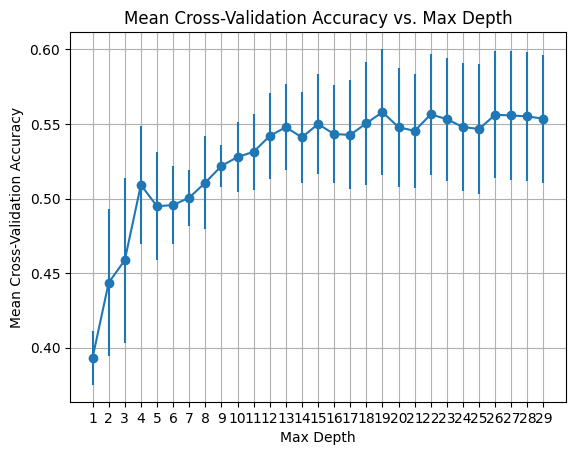

Optimal Max Depth: 19


In [119]:
#Pruning the tree

#Cross Validating for different depths to find the optimum tree size

# Define a range of tree depths to explore
max_depths = range(1, 30)

# Initialize lists to store cross-validation scores
cv_scores_mean = []
cv_scores_std = []

# Loop through each max_depth value and perform cross-validation
for depth in max_depths:
    tree_regionCategory = DecisionTreeClassifier(max_depth=depth, random_state=17)
    scores = cross_val_score(tree_regionCategory, X_encoded, y, cv=5)
    cv_scores_mean.append(np.mean(scores))
    cv_scores_std.append(np.std(scores))

# Plot the mean cross-validation scores with error bars
plt.errorbar(max_depths, cv_scores_mean, yerr=cv_scores_std, fmt='-o')
plt.xlabel('Max Depth')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('Mean Cross-Validation Accuracy vs. Max Depth')
plt.xticks(max_depths)
plt.grid(True)
plt.show()

# Find the optimal max_depth based on cross-validation scores
optimal_max_depth = max_depths[np.argmax(cv_scores_mean)]
print("Optimal Max Depth:", optimal_max_depth)



In [120]:
# Create a decision tree classifier with the best depth
pruned_tree_regionCategory = DecisionTreeClassifier(max_depth=optimal_max_depth, random_state=17)
pruned_tree_regionCategory.fit(X_train_encoded, y_train)

DecisionTreeClassifier(max_depth=19, random_state=17)

Accuracy: 0.9804964539007093


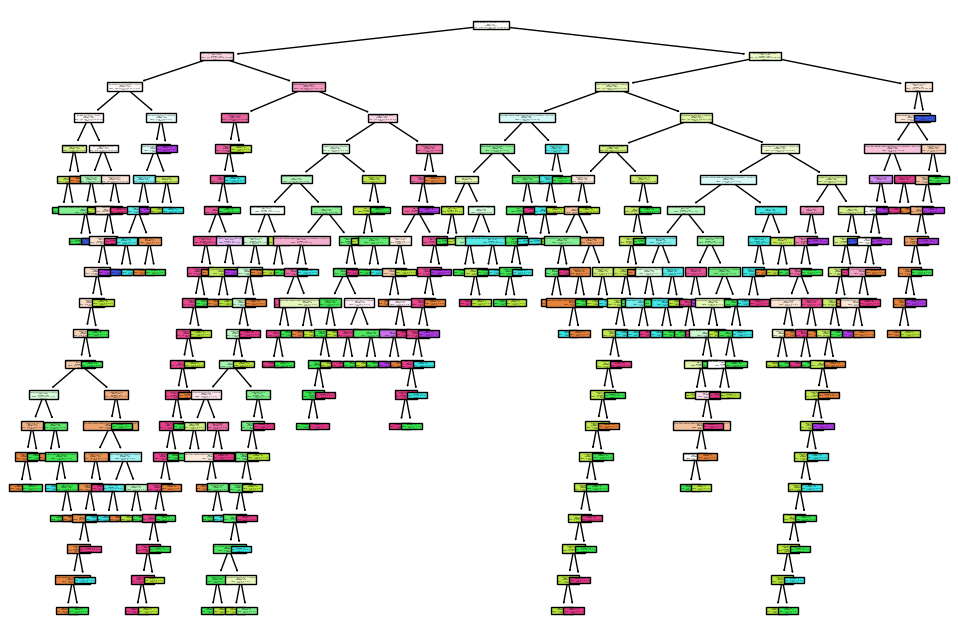

In [121]:
# Making predictions
y_pred_opt = pruned_tree_regionCategory.predict(X_test_encoded)

# Evaluating the model
accuracy_opt = accuracy_score(y_test, y_pred_opt)
print("Accuracy:", accuracy_opt)

# Define class labels
class_labels = ['1', '2', '3', '4', '5', '6', '7']

# Plotting the decision tree
plt.figure(figsize=(12, 8))
plot_tree(pruned_tree_regionCategory, feature_names=features,class_names=class_labels, filled=True)
plt.show()

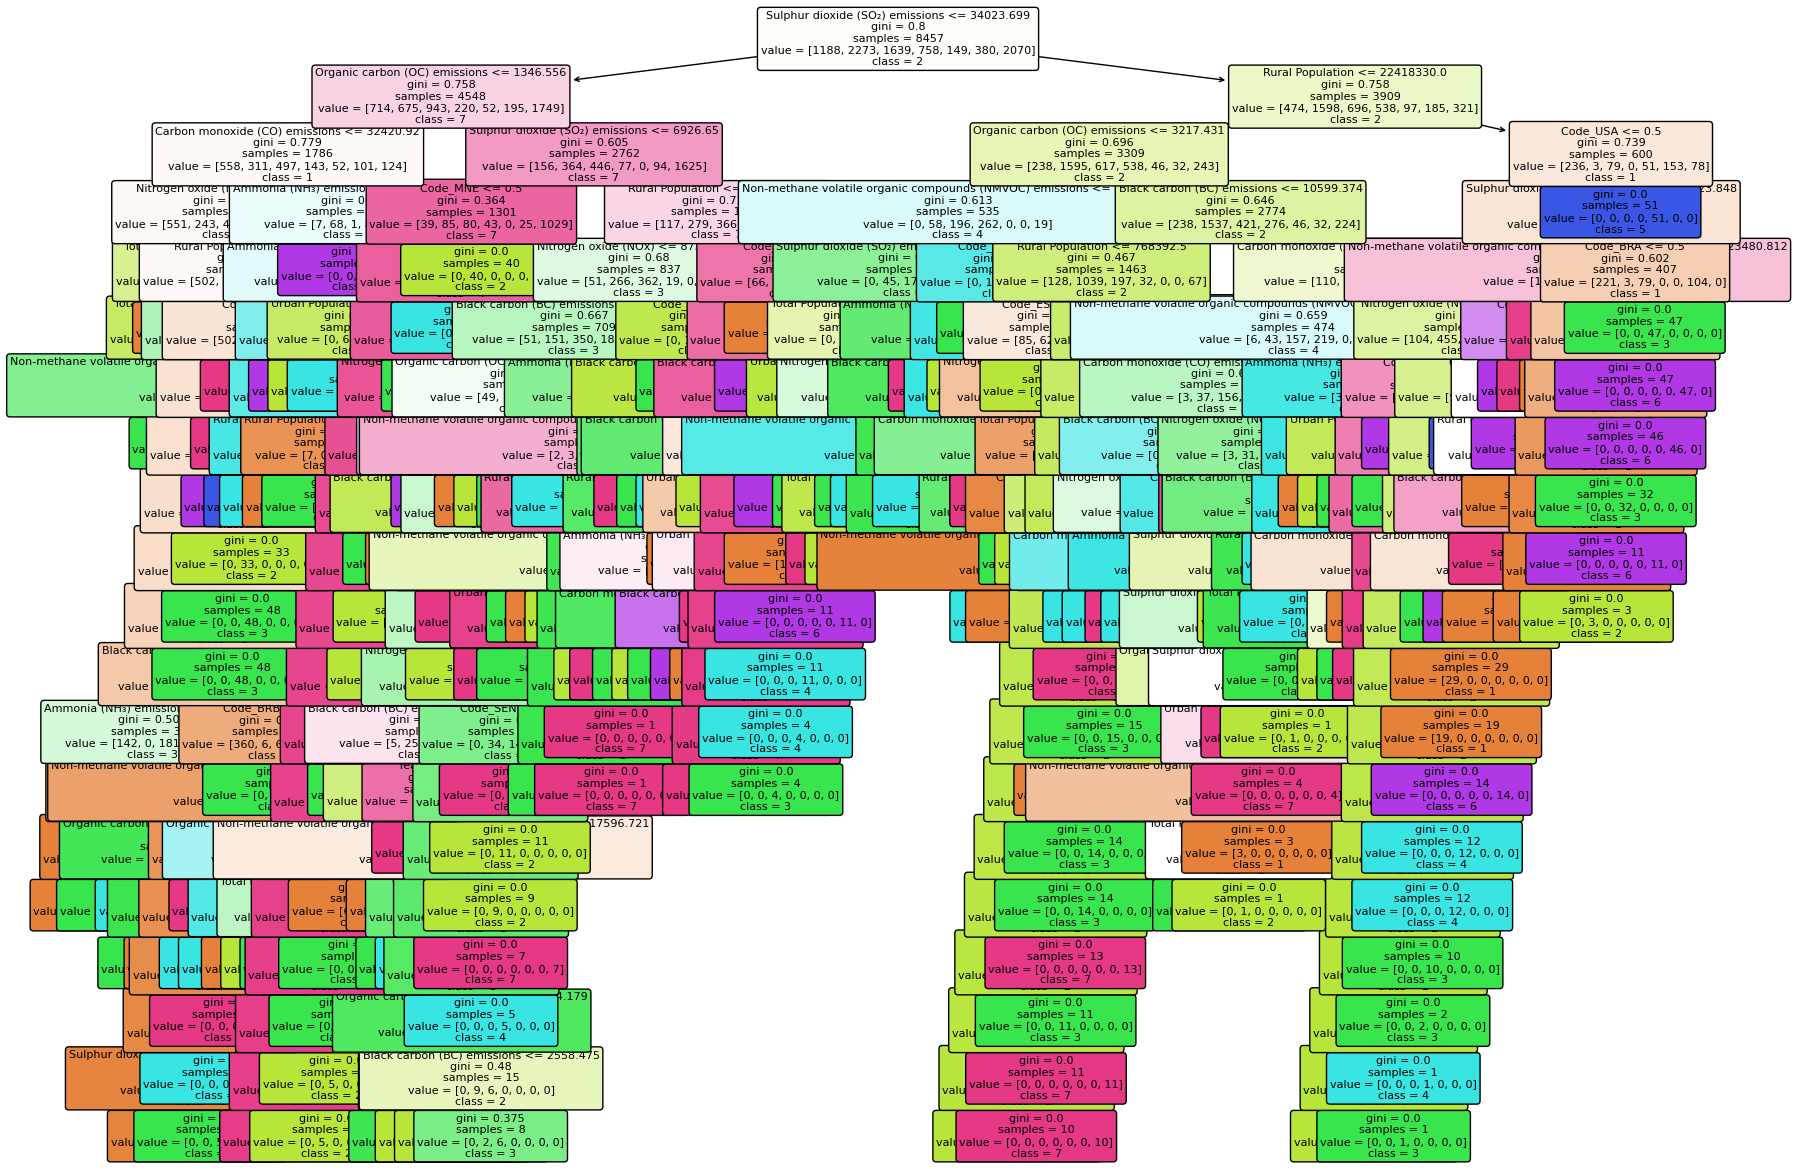

In [ ]:
class_labels = ['1', '2', '3', '4', '5', '6', '7']

plt.figure(figsize=(20, 15))
plt.title('Pruned Tree', fontsize=10)
plot_tree(
    pruned_tree_regionCategory,
    feature_names=features,
    class_names=class_labels,
    filled=True,
    rounded=True,
    fontsize=8)
plt.show()



In [122]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred_opt)
conf_matrix = confusion_matrix(y_test, y_pred_opt)
class_report = classification_report(y_test, y_pred_opt)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9804964539007093
Confusion Matrix:
 [[382   1   2   0   0   0   2]
 [  0 741   8   0   0   0   2]
 [  3   7 551   0   0   0   5]
 [  3   4   0 239   0   0   4]
 [  0   0   0   0  40   0   0]
 [  1   2   0   0   0 118   3]
 [  2   3   2   1   0   0 694]]
Classification Report:
               precision    recall  f1-score   support

           1       0.98      0.99      0.98       387
           2       0.98      0.99      0.98       751
           3       0.98      0.97      0.98       566
           4       1.00      0.96      0.98       250
           5       1.00      1.00      1.00        40
           6       1.00      0.95      0.98       124
           7       0.98      0.99      0.98       702

    accuracy                           0.98      2820
   macro avg       0.99      0.98      0.98      2820
weighted avg       0.98      0.98      0.98      2820



In [123]:
#Finding most important variable

importance = pruned_tree_regionCategory.feature_importances_
features = X_train_encoded.columns

# Create a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the most important predictor
most_important_predictor = feature_importance_df.iloc[0]['Feature']
print("Most Important Predictor:", most_important_predictor)
print(feature_importance_df)

Most Important Predictor: Organic carbon (OC) emissions
                                               Feature  Importance
4                        Organic carbon (OC) emissions    0.095728
9                                     Rural Population    0.092655
2                      Sulphur dioxide (SO₂) emissions    0.092090
1                                 Nitrogen oxide (NOx)    0.058881
5    Non-methane volatile organic compounds (NMVOC)...    0.055265
..                                                 ...         ...
64                                            Code_ETH    0.000000
65                                            Code_FIN    0.000000
118                                           Code_MLI    0.000000
67                                            Code_FRA    0.000000
95                                            Code_JOR    0.000000

[190 rows x 2 columns]


In [124]:
# Print the top 20 most important features
top_20_features = feature_importance_df.head(20)
print("Top 20 Important Features:")
print(top_20_features)

Top 20 Important Features:
                                               Feature  Importance
4                        Organic carbon (OC) emissions    0.095728
9                                     Rural Population    0.092655
2                      Sulphur dioxide (SO₂) emissions    0.092090
1                                 Nitrogen oxide (NOx)    0.058881
5    Non-methane volatile organic compounds (NMVOC)...    0.055265
6                          Black carbon (BC) emissions    0.048926
3                       Carbon monoxide (CO) emissions    0.045188
7                              Ammonia (NH₃) emissions    0.037387
10                                    Total Population    0.025368
106                                           Code_LKA    0.012524
55                                            Code_DJI    0.012002
127                                           Code_MYS    0.011603
8                                     Urban Population    0.011570
122                                

In [125]:
# Ensemble method region Category - gradient Boosting
# Initialize and train Gradient Boosting Regressor
boost_regionCategory = GradientBoostingRegressor(n_estimators=5000, max_depth=optimal_max_depth, random_state=17)
boost_regionCategory.fit(X_train_encoded, y_train)

GradientBoostingRegressor(max_depth=19, n_estimators=5000, random_state=17)

In [126]:
y_test_pred = boost_regionCategory.predict(X_test_encoded)
test_r2 = r2_score(y_test, y_test_pred)
test_r2

0.9797228504744451

In [127]:
# Create a DataFrame of feature importances and their corresponding column names
importances_boost_regionCategory = pd.DataFrame({'Feature': X_train_encoded.columns, 'Importance': boost_regionCategory.feature_importances_})
importances_boost_regionCategory = importances_boost_regionCategory.sort_values('Importance', ascending=False).reset_index(drop=True)

# Display the table
print(importances_boost_regionCategory)

                             Feature    Importance
0      Organic carbon (OC) emissions  1.726181e-01
1    Sulphur dioxide (SO₂) emissions  1.534678e-01
2                   Rural Population  1.239672e-01
3                           Code_KHM  3.003775e-02
4               Nitrogen oxide (NOx)  2.812127e-02
..                               ...           ...
185                         Code_MLI  4.524418e-18
186                         Code_BDI  4.020962e-18
187                         Code_TCD  9.513592e-19
188                         Code_RWA  8.934586e-19
189                         Code_SSD  3.865813e-19

[190 rows x 2 columns]


In [131]:
# List of top 20 features
importances_features_regionCategory = importances_boost_regionCategory['Feature'].tolist()
print(importances_features_regionCategory)

['Organic carbon (OC) emissions', 'Sulphur dioxide (SO₂) emissions', 'Rural Population', 'Code_KHM', 'Nitrogen oxide (NOx)', 'Code_MMR', 'Code_STP', 'Black carbon (BC) emissions', 'Code_SYC', 'Ammonia (NH₃) emissions', 'Code_IDN', 'Code_ZMB', 'Non-methane volatile organic compounds (NMVOC) emissions', 'Code_ZAF', 'Code_ZWE', 'Code_MNE', 'Code_MDV', 'Code_CHN', 'Code_FJI', 'Code_BWA', 'Code_BMU', 'Code_HTI', 'Code_MUS', 'Code_NAM', 'Code_LKA', 'Code_SEN', 'Code_CAN', 'Code_GEO', 'Code_PHL', 'Carbon monoxide (CO) emissions', 'Code_DJI', 'Code_PNG', 'Urban Population', 'Code_MRT', 'Year', 'Code_CIV', 'Code_MYS', 'Code_MLT', 'Code_LVA', 'Code_COM', 'Code_PRY', 'Code_HND', 'Code_NIC', 'Code_DZA', 'Code_MAR', 'Code_BTN', 'Code_THA', 'Code_AGO', 'Code_TUN', 'Code_KEN', 'Code_CRI', 'Code_SVN', 'Code_MDA', 'Code_MNG', 'Total Population', 'Code_VGB', 'Code_BOL', 'Code_LBY', 'Code_LBN', 'Code_SLV', 'Code_SAU', 'Code_USA', 'Code_SUR', 'Code_PAK', 'Code_SDN', 'Code_JOR', 'Code_IRQ', 'Code_BLZ', 'Co

In [132]:
# Filter the DataFrame to include only the top features and the Region_Category

selected_df = pd.concat([X_train_encoded[['Organic carbon (OC) emissions', 'Sulphur dioxide (SO₂) emissions',
                                          'Rural Population', 'Code_KHM', 'Nitrogen oxide (NOx)']],
                         aggregated_df['Region_Category']], axis=1)
# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Extract the correlation of the top features with the Region_Category
correlation_with_Region_Category = correlation_matrix['Region_Category'].drop('Region_Category')

# Print the correlation values
print("\nCorrelation of Top Features with Region_Category:")
print(correlation_with_Region_Category)


Correlation of Top Features with Region_Category:
Organic carbon (OC) emissions      0.014577
Sulphur dioxide (SO₂) emissions   -0.072980
Rural Population                   0.009092
Code_KHM                          -0.091405
Nitrogen oxide (NOx)              -0.046893
Name: Region_Category, dtype: float64


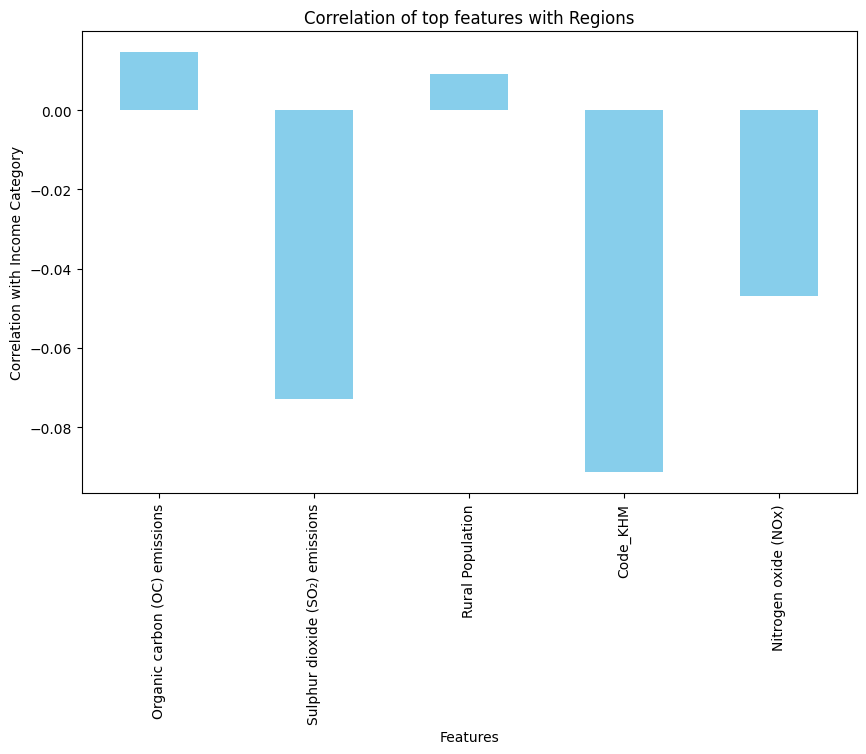

In [133]:
correlation_with_Region_Category.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('Features')
plt.ylabel('Correlation with Income Category')
plt.title('Correlation of top features with Regions')
plt.xticks(rotation=90)
plt.show()

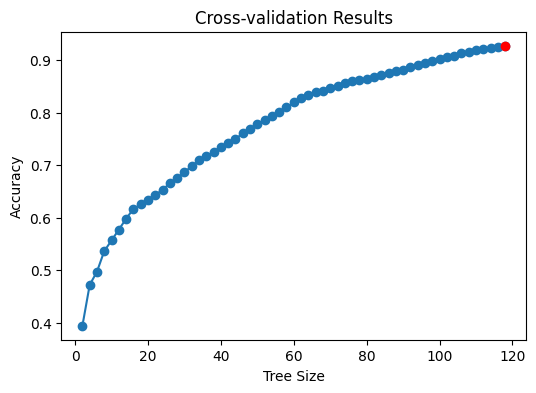

In [134]:
# Cross-validation for optimal max_leaf nodes- Region classification
# Initialize decision tree model
tree_regionCategory = DecisionTreeClassifier(random_state=17)

# Define parameters for cross-validation
params = {'max_leaf_nodes': range(2, 120, 2)}

# Perform cross-validation to determine optimal tree size
cv_regionCategory = GridSearchCV(tree_regionCategory, params, cv=10)
cv_regionCategory.fit(X_train_encoded, y_train)
cv_results = cv_regionCategory.cv_results_

# Find the best score and corresponding tree size
best_size = cv_regionCategory.best_params_['max_leaf_nodes']
best_score = cv_regionCategory.best_score_

# Plot the results of cross-validation
plt.figure(figsize=(6, 4))
plt.plot(cv_results["param_max_leaf_nodes"], cv_results["mean_test_score"], 'o-')
plt.plot(best_size, best_score, 'ro-')
plt.xlabel('Tree Size')
plt.ylabel('Accuracy')
plt.title('Cross-validation Results')
plt.show()

In [135]:
best_size

118

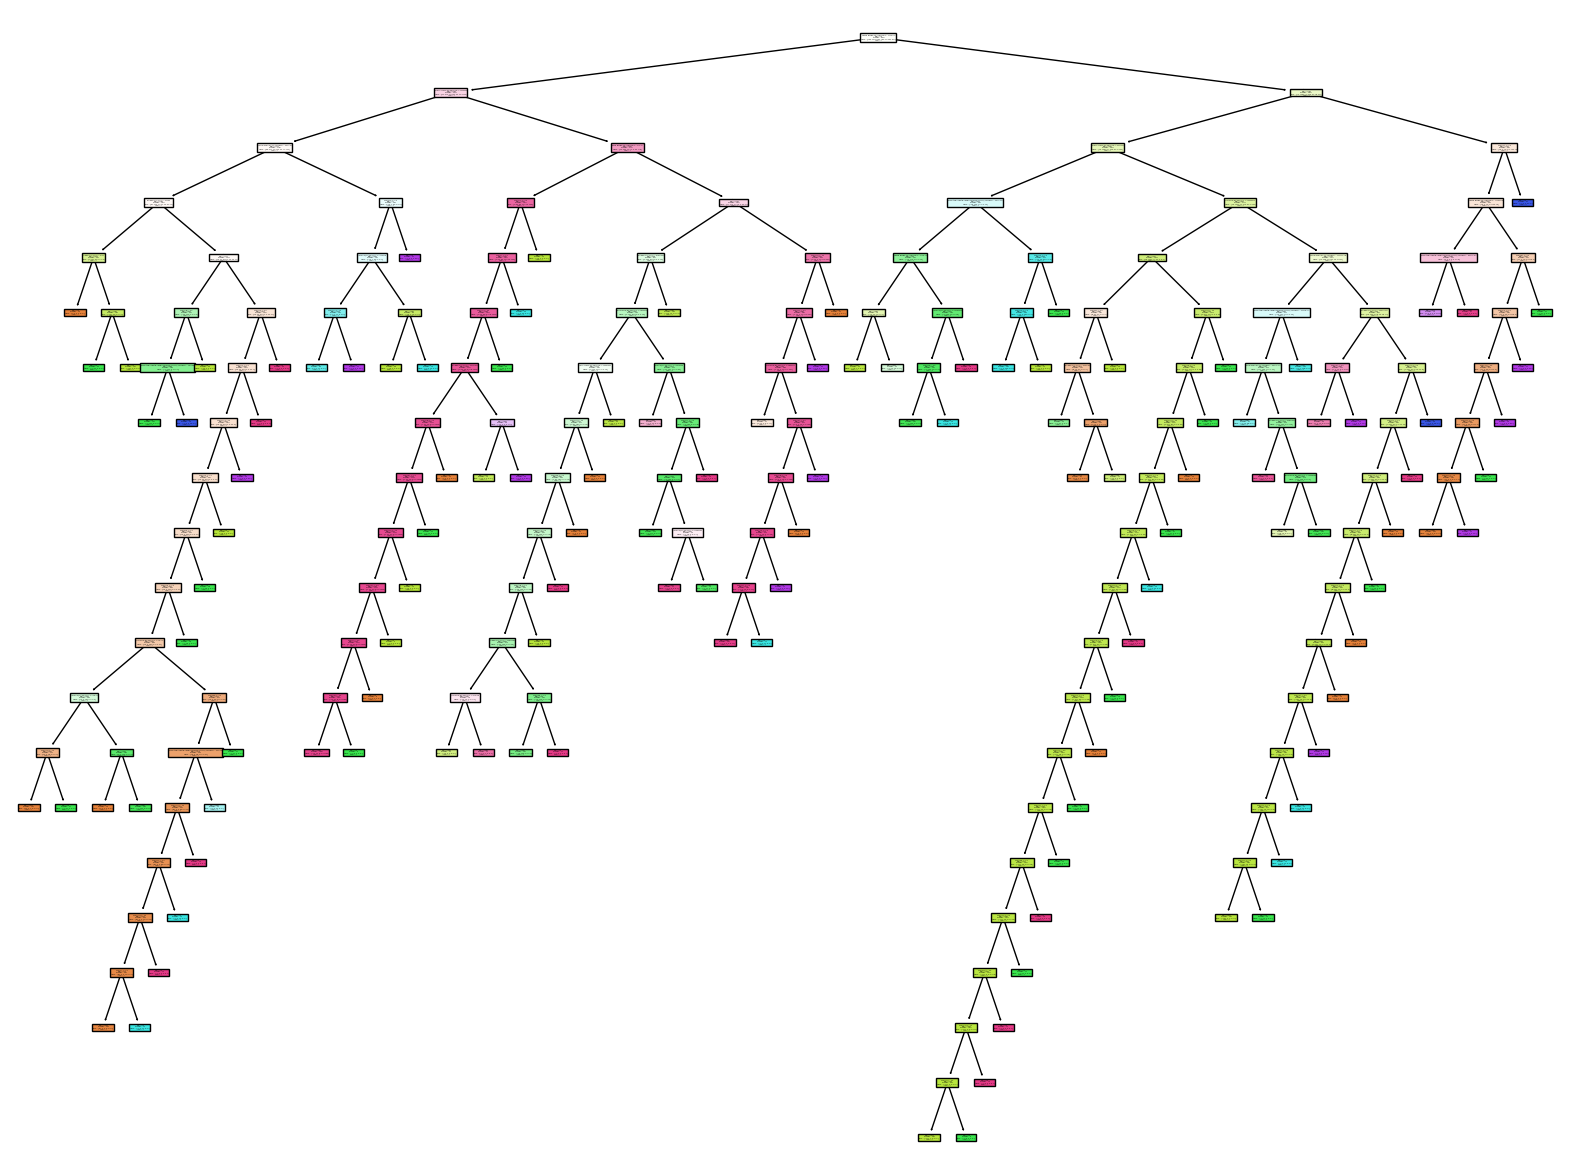

In [136]:
# Prune tree using optimal size
prune_regionCategory = DecisionTreeClassifier(max_leaf_nodes=best_size, random_state=17)
prune_regionCategory.fit(X_train_encoded, y_train)

# Plot pruned tree
plt.figure(figsize=(20, 15))
plt.title('Pruned Tree')
plot_tree(prune_regionCategory, feature_names=X_train_encoded.columns, class_names=['1', '2', '3','4','5','6','7'], filled=True)
plt.show()

In [ ]:
# Obtain predicted labels for the test set
y_pred_pruned = prune_regionCategory.predict(X_test_encoded)

# Calculate accuracy
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print("Accuracy of Pruned Tree:", accuracy_pruned)

# Create confusion matrix
confusion_matrix_pruned = pd.crosstab(index=y_pred_pruned, columns=y_test, rownames=['Predicted'], colnames=['Actual'])
print("\nConfusion Matrix:\n", confusion_matrix_pruned)

Accuracy of Pruned Tree: 0.9195035460992907

Confusion Matrix:
 Actual       0    1    2    3   4    5    6
Predicted                                  
0          354    4   10    4   0    5    4
1            2  695   23    4   0    0    6
2            8   24  506   14   0    0    5
3            5   21    8  212   3    0    3
4            0    0    0    0  37    0    0
5            2    0    0    0   0  113    8
6           16    7   19   16   0    6  676


In [ ]:
#Finding most important variable

importance = prune_regionCategory.feature_importances_
features = X_train_encoded.columns

# Create a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the most important predictor
most_important_predictor = feature_importance_df.iloc[0]['Feature']
print("Most Important Predictor:", most_important_predictor)
print(feature_importance_df)

Most Important Predictor: Organic carbon (OC) emissions
                                               Feature  Importance
4                        Organic carbon (OC) emissions    0.100140
9                                     Rural Population    0.098547
2                      Sulphur dioxide (SO₂) emissions    0.097011
1                                 Nitrogen oxide (NOx)    0.069458
5    Non-methane volatile organic compounds (NMVOC)...    0.056582
..                                                 ...         ...
84                                            Code_HRV    0.000000
86                                            Code_HUN    0.000000
87                                            Code_IDN    0.000000
89                                            Code_IRL    0.000000
189                                           Code_ZWE    0.000000

[190 rows x 2 columns]


In [137]:
# Print the top 20 most important features
top_20_features = feature_importance_df.head(20)
print("Top 20 Important Features:")
print(top_20_features)

Top 20 Important Features:
                                               Feature  Importance
4                        Organic carbon (OC) emissions    0.095728
9                                     Rural Population    0.092655
2                      Sulphur dioxide (SO₂) emissions    0.092090
1                                 Nitrogen oxide (NOx)    0.058881
5    Non-methane volatile organic compounds (NMVOC)...    0.055265
6                          Black carbon (BC) emissions    0.048926
3                       Carbon monoxide (CO) emissions    0.045188
7                              Ammonia (NH₃) emissions    0.037387
10                                    Total Population    0.025368
106                                           Code_LKA    0.012524
55                                            Code_DJI    0.012002
127                                           Code_MYS    0.011603
8                                     Urban Population    0.011570
122                                

In [138]:
# Ensemble method - Bagging
tree_bagging_region = RandomForestRegressor(max_features=X_train_encoded.shape[1], random_state=17)
tree_bagging_region.fit(X_train_encoded, y_train)

print("Number of trees:", tree_bagging_region.n_estimators)
print("Number of features tried at each split:", tree_bagging_region.max_features)
print("Training score: {:.2f}%".format(tree_bagging_region.score(X_train_encoded, y_train) * 100))

Number of trees: 100
Number of features tried at each split: 190
Training score: 99.94%


In [139]:
# Predict target values on the training set
y_pred_region_train = tree_bagging_region.predict(X_train_encoded)

# Calculate Mean Squared Error on the training set
mse_train = mean_squared_error(y_train, y_pred_region_train)

print("Mean Squared Error (Training):", mse_train)

Mean Squared Error (Training): 0.0029645619013834693


In [140]:
accuracy = 1-mse_train
print("Accuracy:", accuracy)

Accuracy: 0.9970354380986165


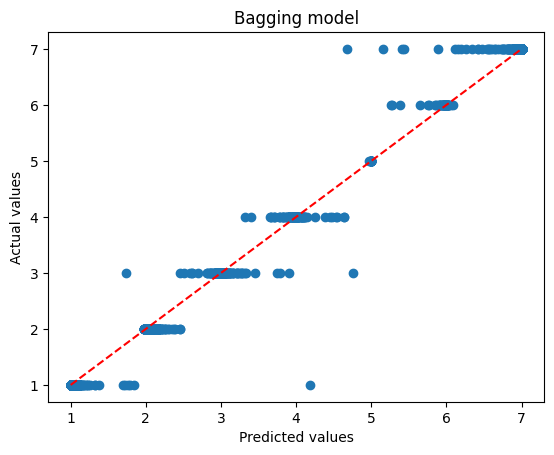

In [141]:
# Predict values
y_pred_region_bag = tree_bagging_region.predict(X_test_encoded)

# Plot predicted vs actual values
plt.scatter(y_pred_region_bag, y_test)
plt.plot([min(y_pred_region_bag), max(y_pred_region_bag)], [min(y_pred_region_bag), max(y_pred_region_bag)], 'r--')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Bagging model')
plt.show()

In [142]:
#Finding most important variable

importance = tree_bagging_region.feature_importances_
features = X_train_encoded.columns

# Create a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the most important predictor
most_important_predictor = feature_importance_df.iloc[0]['Feature']
print("Most Important Predictor:", most_important_predictor)
print(feature_importance_df)

Most Important Predictor: Organic carbon (OC) emissions
                             Feature  Importance
4      Organic carbon (OC) emissions    0.167019
2    Sulphur dioxide (SO₂) emissions    0.156966
9                   Rural Population    0.091289
6        Black carbon (BC) emissions    0.047155
120                         Code_MMR    0.025064
..                               ...         ...
134                         Code_NOR    0.000000
165                         Code_SWE    0.000000
161                         Code_SSD    0.000000
160                         Code_SRB    0.000000
118                         Code_MLI    0.000000

[190 rows x 2 columns]


In [143]:
# Print the top 20 most important features
top_20_features = feature_importance_df.head(20)
print("Top 20 Important Features:")
print(top_20_features)

Top 20 Important Features:
                                               Feature  Importance
4                        Organic carbon (OC) emissions    0.167019
2                      Sulphur dioxide (SO₂) emissions    0.156966
9                                     Rural Population    0.091289
6                          Black carbon (BC) emissions    0.047155
120                                           Code_MMR    0.025064
99                                            Code_KHM    0.024731
1                                 Nitrogen oxide (NOx)    0.023929
168                                           Code_SYC    0.021379
162                                           Code_STP    0.021264
188                                           Code_ZMB    0.020723
187                                           Code_ZAF    0.019495
189                                           Code_ZWE    0.018580
87                                            Code_IDN    0.016067
43                                 

In [144]:
# Filter the DataFrame to include only the top features and the Region_Category

selected_df = pd.concat([X_train_encoded[['Organic carbon (OC) emissions', 'Sulphur dioxide (SO₂) emissions',
                                          'Rural Population', 'Code_MMR', 'Black carbon (BC) emissions']],
                         aggregated_df['Region_Category']], axis=1)
# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Extract the correlation of the top features with the Region_Category
correlation_with_Region_Category = correlation_matrix['Region_Category'].drop('Region_Category')

# Print the correlation values
print("\nCorrelation of Top Features with Region_Category:")
print(correlation_with_Region_Category)


Correlation of Top Features with Region_Category:
Organic carbon (OC) emissions      0.014577
Sulphur dioxide (SO₂) emissions   -0.072980
Rural Population                   0.009092
Code_MMR                          -0.090422
Black carbon (BC) emissions       -0.040129
Name: Region_Category, dtype: float64


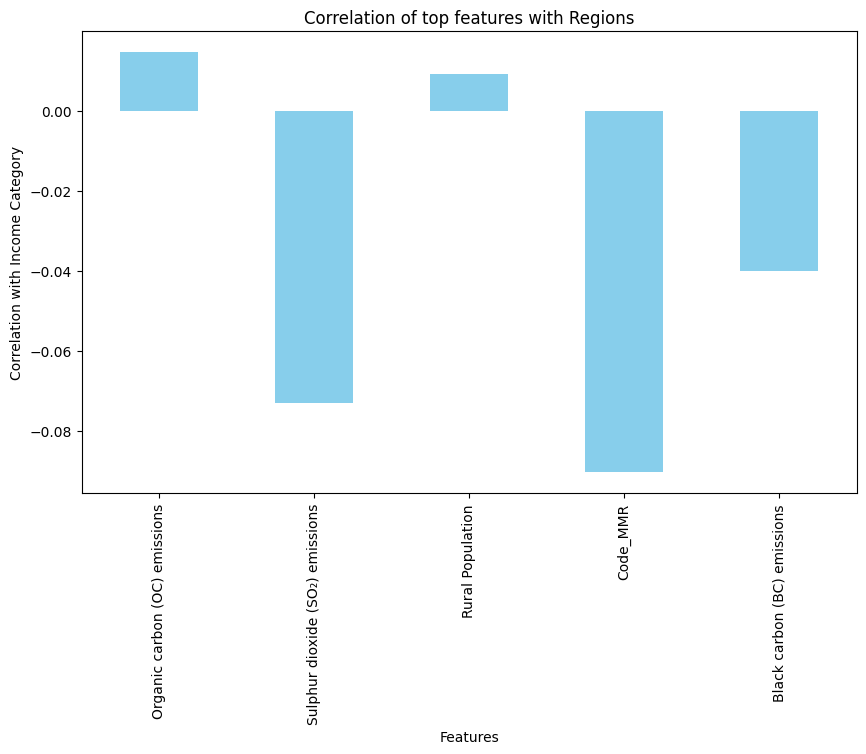

In [145]:
correlation_with_Region_Category.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('Features')
plt.ylabel('Correlation with Income Category')
plt.title('Correlation of top features with Regions')
plt.xticks(rotation=90)
plt.show()

Best parameters found:  {'n_estimators': 100}
Mean Squared Error (Test) with Best Parameters: 0.018909716312056738


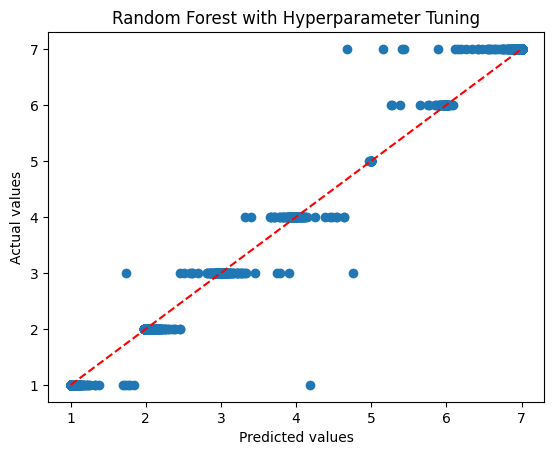

In [146]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    #'max_depth': [10, 20, 30]
}

# Initialize the grid search
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=17),
                           param_grid=param_grid,
                           cv=5)

# Fit the grid search to the data
grid_search.fit(X_train_encoded, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Evaluate the model with the best parameters
best_tree_bagging = grid_search.best_estimator_
y_pred_best = best_tree_bagging.predict(X_test_encoded)
mse_test_best = mean_squared_error(y_test, y_pred_best)
print("Mean Squared Error (Test) with Best Parameters:", mse_test_best)

# Plot the predicted vs actual values
plt.scatter(y_pred_best, y_test)
plt.plot([min(y_pred_best), max(y_pred_best)], [min(y_pred_best), max(y_pred_best)], 'r--')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Random Forest with Hyperparameter Tuning')
plt.show()

In [147]:
accuracy = 1-mse_test_best
print("Testing Accuracy:", accuracy)


Testing Accuracy: 0.9810902836879433


In [148]:
importance = best_tree_bagging.feature_importances_
features = X_train_encoded.columns

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

most_important_predictor = feature_importance_df.iloc[0]['Feature']
print("Most Important Predictor:", most_important_predictor)
print(feature_importance_df)

Most Important Predictor: Organic carbon (OC) emissions
                             Feature  Importance
4      Organic carbon (OC) emissions    0.167019
2    Sulphur dioxide (SO₂) emissions    0.156966
9                   Rural Population    0.091289
6        Black carbon (BC) emissions    0.047155
120                         Code_MMR    0.025064
..                               ...         ...
134                         Code_NOR    0.000000
165                         Code_SWE    0.000000
161                         Code_SSD    0.000000
160                         Code_SRB    0.000000
118                         Code_MLI    0.000000

[190 rows x 2 columns]


#Linear Regression Model for Income Category

In [ ]:
df_linear = aggregated_df
df_linear = df_linear
df_linear.columns

In [ ]:
features = [ 'Code','Year', 'Nitrogen oxide (NOx)',
       'Sulphur dioxide (SO₂) emissions', 'Carbon monoxide (CO) emissions',
       'Organic carbon (OC) emissions',
       'Non-methane volatile organic compounds (NMVOC) emissions',
       'Black carbon (BC) emissions', 'Ammonia (NH₃) emissions',
       'Urban Population', 'Rural Population', 'Total Population'
]

target = 'Income_Category'

In [ ]:
X = df_linear[features]
y = df_linear[target]

In [ ]:
X_inc = df_linear[features]
y_inc = df_linear[target]

X['Code'] = X['Code'].astype('category')
X_train_inc, X_test_inc, y_train_inc, y_test_inc = train_test_split(X_inc, y_inc, test_size=0.25, random_state=17)
X_train_encoded_inc = pd.get_dummies(X_train_inc, columns=['Code'])
X_test_encoded_inc= pd.get_dummies(X_test_inc, columns=['Code'])

In [ ]:
model_incom = LinearRegression()
model_incom.fit(X_train_encoded_inc, y_train_inc)

y_pred_inc = model_incom.predict(X_test_encoded_inc)

r2_inc = r2_score(y_test_inc, y_pred_inc)
mae_inc = mean_absolute_error(y_test_inc, y_pred_inc)
mse_inc = mean_squared_error(y_test_inc, y_pred_inc)
rmse_inc = np.sqrt(mse_inc)

print(f'R² score: {r2_inc}')
print(f'Mean Absolute Error (MAE): {mae_inc}')
print(f'Mean Squared Error (MSE): {mse_inc}')
print(f'Root Mean Squared Error (RMSE): {rmse_inc}')

R² score: 0.9999999999988752
Mean Absolute Error (MAE): 4.1278853953271366e-07
Mean Squared Error (MSE): 1.2421261265863657e-12
Root Mean Squared Error (RMSE): 1.1145071227167486e-06


In [ ]:
accuracy = 1-mse_inc
print("Accuracy:", accuracy)

Accuracy: 0.9999999999987579


#Linear Regression Model for Region Category

In [ ]:
features_multi = [ 'Code','Year', 'Nitrogen oxide (NOx)', 'Sulphur dioxide (SO₂) emissions',
                   'Carbon monoxide (CO) emissions', 'Organic carbon (OC) emissions',
                   'Non-methane volatile organic compounds (NMVOC) emissions',
                   'Black carbon (BC) emissions', 'Ammonia (NH₃) emissions',
                   'Urban Population', 'Rural Population', 'Total Population' ]

target_multi = 'Region_Category'

le = LabelEncoder()
df_linear[target_multi] = le.fit_transform(df_linear[target_multi])

In [ ]:
X = df_linear[features_multi]
y = df_linear[target_multi]

X['Code'] = X['Code'].astype('category')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)
X_train_encoded = pd.get_dummies(X_train, columns=['Code'])
X_test_encoded = pd.get_dummies(X_test, columns=['Code'])

<ipython-input-140-83240b69e3b2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Code'] = X['Code'].astype('category')


In [ ]:
model = LinearRegression()
model.fit(X_train_encoded, y_train)
y_pred = model.predict(X_test_encoded)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'R² score: {r2}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

R² score: 0.9999999999918546
Mean Absolute Error (MAE): 4.043805747539128e-06
Mean Squared Error (MSE): 3.945513501979752e-11
Root Mean Squared Error (RMSE): 6.281332264718809e-06


In [ ]:
accuracy = 1-mse
print("Accuracy:", accuracy)

Accuracy: 0.9999999999605449


#SVM and Linear Classification

In [ ]:
#df_linear = aggregated_df
#df_linear = df_linear
#df_linear.columns

In [ ]:
#features = [ 'Code','Year', 'Nitrogen oxide (NOx)',
#       'Sulphur dioxide (SO₂) emissions', 'Carbon monoxide (CO) emissions',
#       'Organic carbon (OC) emissions',
#       'Non-methane volatile organic compounds (NMVOC) emissions',
#      'Black carbon (BC) emissions', 'Ammonia (NH₃) emissions',
#       'Urban Population', 'Rural Population', 'Total Population'
#]

#target = 'Income_Category'

In [ ]:
#X_inc = df_linear[features]
#y_inc = df_linear[target]

#X_inc['Code'] = X_inc['Code'].astype('category')
#X_train_inc, X_test_inc, y_train_inc, y_test_inc = train_test_split(X_inc, y_inc, test_size=0.25, random_state=17)
#X_train_encoded_inc = pd.get_dummies(X_train_inc, columns=['Code'])
#X_test_encoded_inc= pd.get_dummies(X_test_inc, columns=['Code'])

In [ ]:
#svc_model_linear = SVC(kernel='linear', C = 0.01, random_state = 17)
#svc_model_linear.fit(X_train_encoded_inc, y_train_inc)

In [ ]:
#y_train_pred_linear = svc_model_linear.predict(X_train_encoded_inc)
#y_test_pred_linear = svc_model_linear.predict(X_test_encoded_inc)
#accuracy_train_linear = accuracy_score(y_train_inc, y_train_pred_linear)
#accuracy_test_linear = accuracy_score(y_test_inc, y_test_pred_linear)

In [ ]:
#print("Linear model training  accuracy:", accuracy_train_linear)
#print("linear model testing accuracy:", accuracy_test_linear)